## <font color = "lightseagreen">0. Importing libraries/credentials/dataset<font>

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from datetime import datetime

%matplotlib inline

In [66]:
# credentials removed after running the script for privacy protection
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="",
                                                           client_secret=""))

<font color = "royalblue">In order to make sure that there is enough diversity in the songs, a random sample of 10000 songs will be extracted from a dataset of almost 170K songs found at https://www.kaggle.com/datasets/fcpercival/160k-spotify-songs-sorted?resource=download. Since the goal is the creation of a MVP and running some of the algorithms in this script would be very time-consuming with the entire dataset, this looks like the better option.
<br>Unfortunately, due to technical difficulties the data collected for the previous lab ended up belonging to only one kind of music and as such they wouldn't provide the basis for the creation of a good song recommender.<font>

In [67]:
data_160k = pd.read_csv("160K_tracks_data.csv")
data_160k

id  \
0       0gNNToCW3qjabgTyBSjt3H   
1       0tMgFpOrXZR6irEOLNWwJL   
2       2ZywW3VyVx6rrlrX75n3JB   
3       6DdWA7D1o5TU2kXWyCLcch   
4       3vMmwsAiLDCfyc1jl76lQE   
...                        ...   
169902  4KiYPYpm4ultIp247ftPlI   
169903  42tFTth2jcF7iSo0RBjfJF   
169904  6XP9L7di5JnOc9WaeAW8oe   
169905  3Gpdzw72aBVJSrm5J1leVK   
169906  2p5DfmIUTLH79elmaSCCR5   

                                                     name  \
0                               !Que Vida! - Mono Version   
1                                                    "40"   
2                                             "40" - Live   
3                                  "40" - Remastered 2008   
4                                  "40" - Remastered 2008   
...                                                   ...   
169902                                 텅 빈 마음 Empty Heart   
169903                                     피카부 Peek-A-Boo   
169904                                     행복 (Happiness)   
169905  헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...   
169906                화려하지 않은 고백 Confession Is Not Flashy   

                        artists  duration_ms release_date  year  acousticness  \
0                      ['Love']       220560      11/1/66  1966        0.5250   
1                        ['U2']       157840      2/28/83  1983        0.2280   
2                        ['U2']       226200      8/20/83  1983        0.0998   
3                        ['U2']       157667      2/28/83  1983        0.1850   
4                        ['U2']       157667      2/28/83  1983        0.1850   
...                         ...          ...          ...   ...           ...   
169902       ['LEE SEUNG HWAN']       249893     10/15/89  1989        0.4290   
169903           ['Red Velvet']       189050     11/17/17  2017        0.0868   
169904           ['Red Velvet']       220987       8/1/14  2014        0.3230   
169905  ['Leessang', 'Jung In']       284627      10/6/09  2009        0.1500   
169906       ['LEE SEUNG HWAN']       230733       9/1/93  1993        0.4480   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.600   0.540          0.003050    0.1000   -11.803   
1              0.368   0.480          0.707000    0.1590   -11.605   
2              0.272   0.684          0.014500    0.9460    -9.728   
3              0.371   0.545          0.582000    0.1830    -9.315   
4              0.371   0.545          0.582000    0.1830    -9.315   
...              ...     ...               ...       ...       ...   
169902         0.547   0.304          0.000000    0.1430   -14.326   
169903         0.839   0.902          0.002570    0.2720    -3.612   
169904         0.727   0.871          0.000006    0.7250    -3.099   
169905         0.523   0.841          0.000000    0.1640    -2.505   
169906         0.741   0.380          0.000811    0.0806    -9.539   

        speechiness    tempo  valence  mode  key  popularity  explicit  
0            0.0328  125.898    0.547     1    9          26         0  
1            0.0306  150.166    0.338     1    8          21         0  
2            0.0505  143.079    0.279     1    8          41         0  
3            0.0307  150.316    0.310     1    8          37         0  
4            0.0307  150.316    0.310     1    8          35         0  
...             ...      ...      ...   ...  ...         ...       ...  
169902       0.0336   74.164    0.157     0   11          35         0  
169903       0.0536  114.953    0.639     0    1          69         0  
169904       0.1580  121.438    0.681     0   10          58         0  
169905       0.3310  173.903    0.383     0   10          52         0  
169906       0.0285  101.971    0.264     1    2          43         0  

[169907 rows x 19 columns]

## <font color = "lightseagreen">1. Sampling/cleaning data<font>

In [68]:
""" sampled_df = data_160k.sample(10000)
sampled_df """

' sampled_df = data_160k.sample(10000)\nsampled_df '

In [69]:
""" sampled_df.to_csv("sampled_df.csv") """

' sampled_df.to_csv("sampled_df.csv") '

In [70]:
sampled_df = pd.read_csv("sampled_df.csv", index_col=0)

In [71]:
sampled_df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [72]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 50380 to 153851
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  object 
 1   name              10000 non-null  object 
 2   artists           10000 non-null  object 
 3   duration_ms       10000 non-null  int64  
 4   release_date      10000 non-null  object 
 5   year              10000 non-null  int64  
 6   acousticness      10000 non-null  float64
 7   danceability      10000 non-null  float64
 8   energy            10000 non-null  float64
 9   instrumentalness  10000 non-null  float64
 10  liveness          10000 non-null  float64
 11  loudness          10000 non-null  float64
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  float64
 14  valence           10000 non-null  float64
 15  mode              10000 non-null  int64  
 16  key               10000 non-null  i

In [73]:
sampled_df.duplicated().sum()

0

In [74]:
# dropping duplicates
sampled_df = sampled_df.drop_duplicates(keep="first")

<font color = "royalblue">- The column id contains the spotify ids of the tracks and is not descriptive of their features. It will be dropped.
<br>- The column release_date contains dates in multiple formats. It must be cleaned before it can be used. However a look at the specific kinds of formats in it (see below) reveals that something like that is not possible without a comprehensive dive into all defferent formats and a tailored approach. Since there is already a column year (essentially release year), the column release_date will be dropped.
<br>- The column artists has the artist names contained in brackets. It would be better to remove them before moving on.<font>

In [75]:
sampled_df["release_date"]

50380      10/7/16
92652         1956
52546      7/13/04
56664         1928
64162     11/17/95
            ...   
14309       1/1/98
3078       1965-02
32213       1/1/30
70740     12/31/47
153851      1/1/97
Name: release_date, Length: 10000, dtype: object

In [76]:
""" # time since release might be a more appropriate feature to work with instead of year. It will be tested later on
year_now = datetime.now().year
sampled_df["years_since_release"] = year_now - sampled_df["year"] """

' # time since release might be a more appropriate feature to work with instead of year. It will be tested later on\nyear_now = datetime.now().year\nsampled_df["years_since_release"] = year_now - sampled_df["year"] '

In [77]:
sampled_df = sampled_df.drop(["id", "release_date"], axis = 1)
sampled_df

name  \
50380                           Going Through Some Thangs   
92652                                   Mountain Greenery   
52546                                      Guns Are Drawn   
56664                                  High Sheriff Blues   
64162   I'll Remember (Theme from the Motion Picture W...   
...                                                   ...   
14309                           Before You Hit The Ground   
3078                  A Love Supreme, Pt. II - Resolution   
32213                       Den ehis tipota, ma ehis kati   
70740                       Jao Jao Mere Jivan Ke Ujiyare   
153851                                             Volare   

                                                  artists  duration_ms  year  \
50380                                     ['Yella Beezy']       282096  2016   
92652                    ['Bing Crosby', 'Buddy Bregman']       216227  1956   
52546                         ['The Roots', 'Son Little']       315787  2004   
56664                                  ['Charley Patton']       186707  1928   
64162                                         ['Madonna']       263813  1995   
...                                                   ...          ...   ...   
14309                                      ['Jonny Lang']       234427  1998   
3078                                    ['John Coltrane']       437840  1965   
32213                                     ['Sofia Vempo']       177147  1930   
70740                                ['Lalita Dewoolkar']       177317  1947   
153851  ['Luciano Pavarotti', 'Orchestra del Teatro Co...       273667  1997   

        acousticness  danceability  energy  instrumentalness  liveness  \
50380         0.0335         0.747  0.7210          0.000000    0.2580   
92652         0.6890         0.581  0.0787          0.000000    0.1050   
52546         0.0634         0.932  0.6440          0.000009    0.1100   
56664         0.9950         0.510  0.1350          0.000000    0.3640   
64162         0.6280         0.691  0.6010          0.017000    0.0709   
...              ...           ...     ...               ...       ...   
14309         0.1950         0.722  0.8760          0.005390    0.0861   
3078          0.5810         0.341  0.5700          0.000000    0.0966   
32213         0.9950         0.392  0.3910          0.370000    0.1370   
70740         0.9950         0.509  0.2220          0.930000    0.4400   
153851        0.9650         0.334  0.2320          0.000016    0.3050   

        loudness  speechiness    tempo  valence  mode  key  popularity  \
50380     -7.278       0.0997  130.987    0.625     0    5          52   
92652    -17.898       0.0329  114.782    0.364     1    7           7   
52546     -4.030       0.1750   97.135    0.717     0    9          50   
56664    -12.502       0.0394   80.761    0.628     1   10           0   
64162     -9.698       0.0428  167.796    0.850     1    7          50   
...          ...          ...      ...      ...   ...  ...         ...   
14309     -5.896       0.0918   92.190    0.843     1    9          36   
3078     -11.710       0.0673   89.754    0.392     1    8          45   
32213    -11.201       0.0389  115.399    0.384     1    9           0   
70740    -10.571       0.0390  114.190    0.750     0    5           0   
153851   -15.092       0.0496  130.095    0.338     1    2          43   

        explicit  
50380          1  
92652          0  
52546          0  
56664          0  
64162          0  
...          ...  
14309          0  
3078           0  
32213          0  
70740          0  
153851         0  

[10000 rows x 17 columns]

In [78]:
sampled_df["artists"] = sampled_df["artists"].str.replace("[", "").str.replace("]", "")
sampled_df["artists"]

C:\Users\vagli\AppData\Local\Temp\ipykernel_13084\3665482697.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sampled_df["artists"] = sampled_df["artists"].str.replace("[", "").str.replace("]", "")


50380                                         'Yella Beezy'
92652                        'Bing Crosby', 'Buddy Bregman'
52546                             'The Roots', 'Son Little'
56664                                      'Charley Patton'
64162                                             'Madonna'
                                ...                        
14309                                          'Jonny Lang'
3078                                        'John Coltrane'
32213                                         'Sofia Vempo'
70740                                    'Lalita Dewoolkar'
153851    'Luciano Pavarotti', 'Orchestra del Teatro Com...
Name: artists, Length: 10000, dtype: object

## <font color = "lightseagreen">2. EDA<font>

In [79]:
print("mode values:", sampled_df["mode"].unique())
print("keys:", sampled_df["key"].unique())
print("explicit values:", sampled_df["explicit"].unique())

mode values: [0 1]
keys: [ 5  7  9 10  1  4  2  0  8 11  6  3]
explicit values: [1 0]


<font color = "royalblue">The columns mode, key and explicit are considered numerical, but in actuality represent categorical features. <font>

In [80]:
# before clustering, the data must be scaled. to make that step easier and have a better overview of the data to scale, they will be turned to categorical
sampled_df["mode"] = sampled_df["mode"].astype("str")
sampled_df["key"] = sampled_df["key"].astype("str")
sampled_df["explicit"] = sampled_df["explicit"].astype("str")

In [81]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 50380 to 153851
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10000 non-null  object 
 1   artists           10000 non-null  object 
 2   duration_ms       10000 non-null  int64  
 3   year              10000 non-null  int64  
 4   acousticness      10000 non-null  float64
 5   danceability      10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   liveness          10000 non-null  float64
 9   loudness          10000 non-null  float64
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  valence           10000 non-null  float64
 13  mode              10000 non-null  object 
 14  key               10000 non-null  object 
 15  popularity        10000 non-null  int64  
 16  explicit          10000 non-null  o

In [82]:
# as the tracks were extracted from the data_160k dataframe randomly, the index of the new dataframe also consists of random numbers
sampled_df = sampled_df.reset_index(drop=True)
sampled_df

name  \
0                             Going Through Some Thangs   
1                                     Mountain Greenery   
2                                        Guns Are Drawn   
3                                    High Sheriff Blues   
4     I'll Remember (Theme from the Motion Picture W...   
...                                                 ...   
9995                          Before You Hit The Ground   
9996                A Love Supreme, Pt. II - Resolution   
9997                      Den ehis tipota, ma ehis kati   
9998                      Jao Jao Mere Jivan Ke Ujiyare   
9999                                             Volare   

                                                artists  duration_ms  year  \
0                                         'Yella Beezy'       282096  2016   
1                        'Bing Crosby', 'Buddy Bregman'       216227  1956   
2                             'The Roots', 'Son Little'       315787  2004   
3                                      'Charley Patton'       186707  1928   
4                                             'Madonna'       263813  1995   
...                                                 ...          ...   ...   
9995                                       'Jonny Lang'       234427  1998   
9996                                    'John Coltrane'       437840  1965   
9997                                      'Sofia Vempo'       177147  1930   
9998                                 'Lalita Dewoolkar'       177317  1947   
9999  'Luciano Pavarotti', 'Orchestra del Teatro Com...       273667  1997   

      acousticness  danceability  energy  instrumentalness  liveness  \
0           0.0335         0.747  0.7210          0.000000    0.2580   
1           0.6890         0.581  0.0787          0.000000    0.1050   
2           0.0634         0.932  0.6440          0.000009    0.1100   
3           0.9950         0.510  0.1350          0.000000    0.3640   
4           0.6280         0.691  0.6010          0.017000    0.0709   
...            ...           ...     ...               ...       ...   
9995        0.1950         0.722  0.8760          0.005390    0.0861   
9996        0.5810         0.341  0.5700          0.000000    0.0966   
9997        0.9950         0.392  0.3910          0.370000    0.1370   
9998        0.9950         0.509  0.2220          0.930000    0.4400   
9999        0.9650         0.334  0.2320          0.000016    0.3050   

      loudness  speechiness    tempo  valence mode key  popularity explicit  
0       -7.278       0.0997  130.987    0.625    0   5          52        1  
1      -17.898       0.0329  114.782    0.364    1   7           7        0  
2       -4.030       0.1750   97.135    0.717    0   9          50        0  
3      -12.502       0.0394   80.761    0.628    1  10           0        0  
4       -9.698       0.0428  167.796    0.850    1   7          50        0  
...        ...          ...      ...      ...  ...  ..         ...      ...  
9995    -5.896       0.0918   92.190    0.843    1   9          36        0  
9996   -11.710       0.0673   89.754    0.392    1   8          45        0  
9997   -11.201       0.0389  115.399    0.384    1   9           0        0  
9998   -10.571       0.0390  114.190    0.750    0   5           0        0  
9999   -15.092       0.0496  130.095    0.338    1   2          43        0  

[10000 rows x 17 columns]

In [83]:
sampled_df.describe().T

count           mean            std      min  \
duration_ms       10000.0  232338.225200  122849.948497  15933.0   
year              10000.0    1977.289100      25.606708   1921.0   
acousticness      10000.0       0.492906       0.375670      0.0   
danceability      10000.0       0.537512       0.177606      0.0   
energy            10000.0       0.489699       0.267087      0.0   
instrumentalness  10000.0       0.165513       0.311915      0.0   
liveness          10000.0       0.205902       0.177868      0.0   
loudness          10000.0     -11.352467       5.678335    -60.0   
speechiness       10000.0       0.092754       0.147482      0.0   
tempo             10000.0     116.798031      30.465967      0.0   
valence           10000.0       0.529082       0.263805      0.0   
popularity        10000.0      31.578600      21.527493      0.0   

                           25%            50%           75%          max  
duration_ms       170872.25000  209096.000000  262035.25000  3432107.000  
year                1957.00000    1978.000000    1999.00000     2020.000  
acousticness           0.09790       0.488500       0.88500        0.996  
danceability           0.41400       0.548000       0.67000        0.986  
energy                 0.26200       0.481000       0.70900        1.000  
instrumentalness       0.00000       0.000222       0.09985        0.999  
liveness               0.09890       0.135000       0.25600        0.999  
loudness             -14.45625     -10.450000      -7.07800       -0.171  
speechiness            0.03490       0.044600       0.07380        0.966  
tempo                 93.64900     114.487000     135.60850      214.451  
valence                0.31900       0.539000       0.74900        0.996  
popularity            12.00000      33.000000      48.00000       94.000

In [84]:
len(sampled_df.loc[sampled_df["loudness"]<0])

10000

In [85]:
# picking numerical features for visualisations
to_scale = sampled_df.select_dtypes(include = np.number)
to_scale

duration_ms  year  acousticness  danceability  energy  instrumentalness  \
0          282096  2016        0.0335         0.747  0.7210          0.000000   
1          216227  1956        0.6890         0.581  0.0787          0.000000   
2          315787  2004        0.0634         0.932  0.6440          0.000009   
3          186707  1928        0.9950         0.510  0.1350          0.000000   
4          263813  1995        0.6280         0.691  0.6010          0.017000   
...           ...   ...           ...           ...     ...               ...   
9995       234427  1998        0.1950         0.722  0.8760          0.005390   
9996       437840  1965        0.5810         0.341  0.5700          0.000000   
9997       177147  1930        0.9950         0.392  0.3910          0.370000   
9998       177317  1947        0.9950         0.509  0.2220          0.930000   
9999       273667  1997        0.9650         0.334  0.2320          0.000016   

      liveness  loudness  speechiness    tempo  valence  popularity  
0       0.2580    -7.278       0.0997  130.987    0.625          52  
1       0.1050   -17.898       0.0329  114.782    0.364           7  
2       0.1100    -4.030       0.1750   97.135    0.717          50  
3       0.3640   -12.502       0.0394   80.761    0.628           0  
4       0.0709    -9.698       0.0428  167.796    0.850          50  
...        ...       ...          ...      ...      ...         ...  
9995    0.0861    -5.896       0.0918   92.190    0.843          36  
9996    0.0966   -11.710       0.0673   89.754    0.392          45  
9997    0.1370   -11.201       0.0389  115.399    0.384           0  
9998    0.4400   -10.571       0.0390  114.190    0.750           0  
9999    0.3050   -15.092       0.0496  130.095    0.338          43  

[10000 rows x 12 columns]

In [86]:
len(to_scale.columns)

12

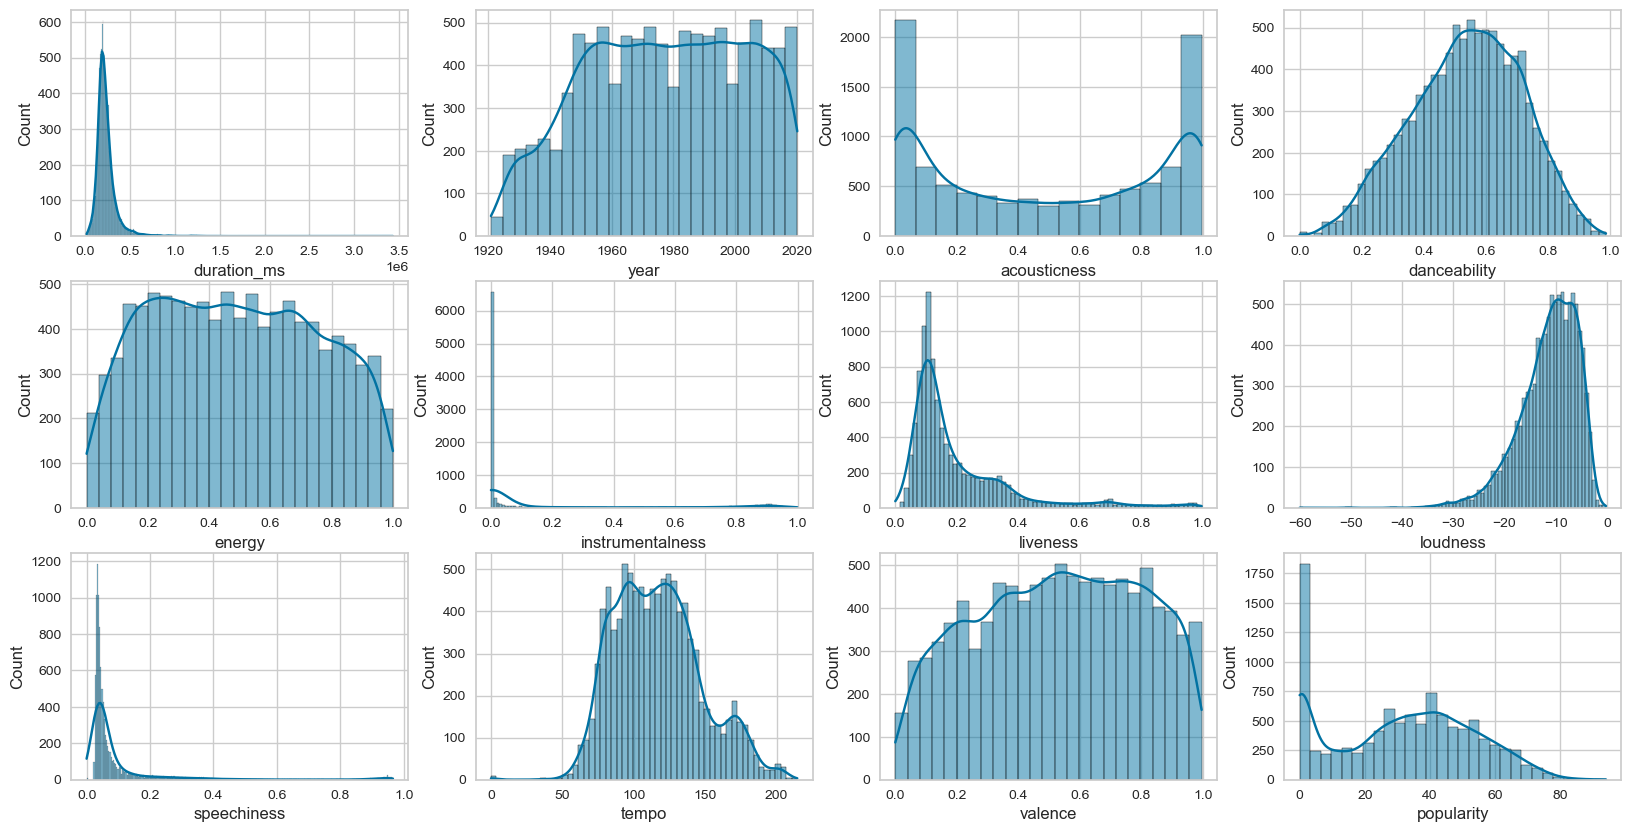

In [87]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for column, ax in zip(to_scale.columns, axes.flat):
    sns.histplot(to_scale[column], kde = True, ax = ax)
plt.show()

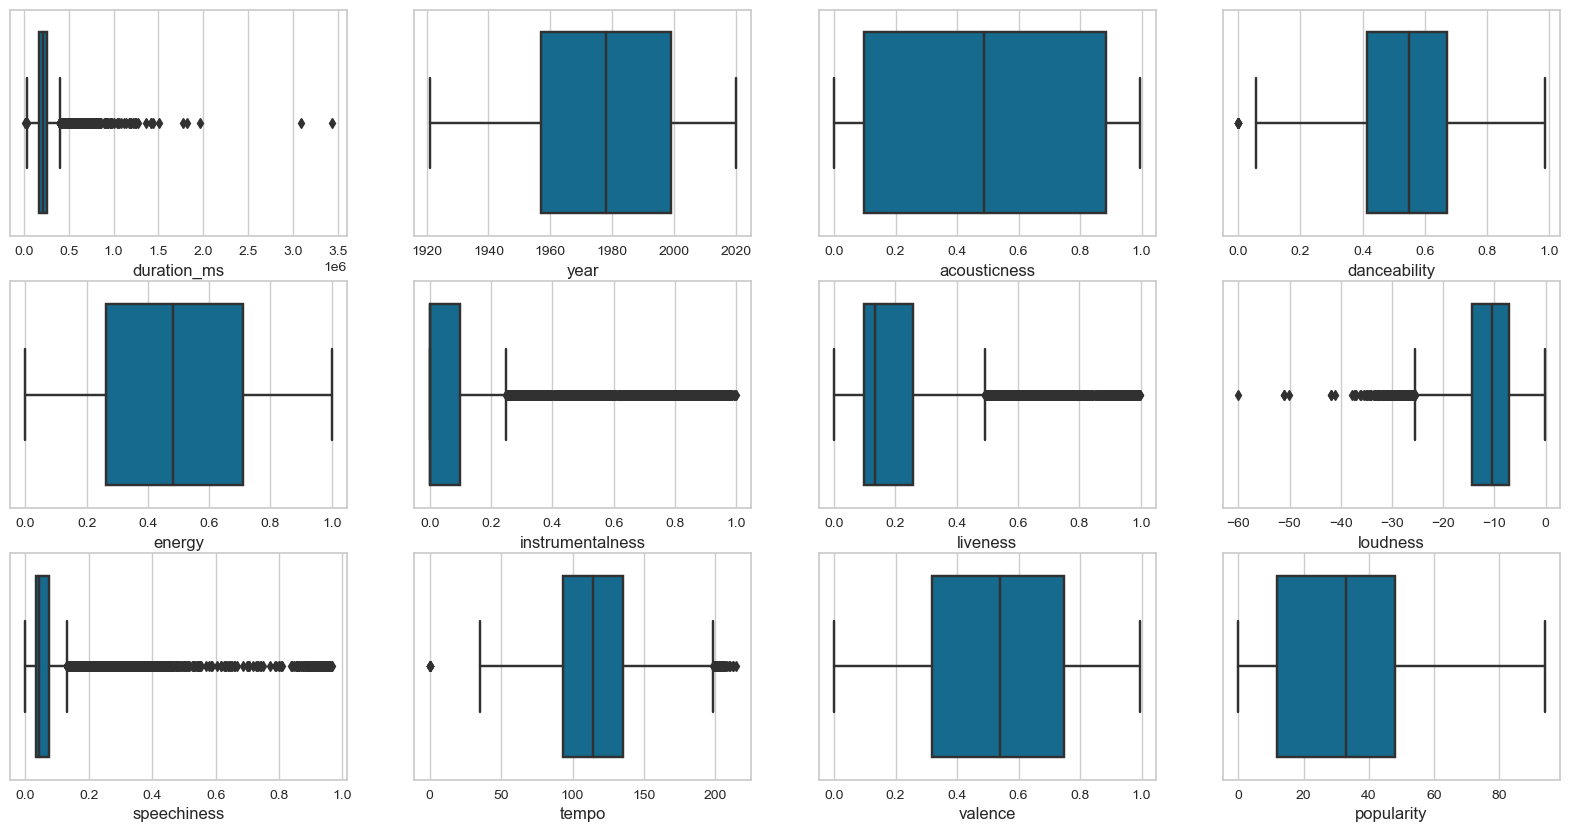

In [88]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for column, ax in zip(to_scale.columns, axes.flat):
    sns.boxplot(to_scale, x = column, ax = ax)
plt.show()

In [89]:
len(sampled_df.loc[sampled_df["instrumentalness"]<0.1])

7500

In [90]:
len(sampled_df.loc[sampled_df["liveness"]<0.5])

9268

In [91]:
len(sampled_df.loc[sampled_df["speechiness"]<0.17])

8888

<font color = "royalblue">Most distributions are skewed and only a few of them resemble normal ditribution. Additionally there is a considerable number of outliers for multiple features.
<br> Looking closer, some things stick out:
<br> duration_ms: most values are very close to the average, which results in many of the data points appearing as outliers. Still there are a couple that look like they might require attention.
<br> instrumentalness: almost the same as before, but this time outliers are harder to exclude and 3/4 of the data points have values < 0.1, while the max value is close to 1.
<br> loudness: consists of only negative values. Distribution skewed to the left. Some obvious outliers can be seen.
<br> speechiness: again strongly aggregated data points around the average. Outliers hard to spot.<font>

In [92]:
sampled_df.loc[sampled_df["duration_ms"]==max(sampled_df["duration_ms"])]

name        artists  duration_ms  year  acousticness  \
2307  Aladdin - Storyteller  'Chuck Riley'      3432107  2004         0.776   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
2307         0.532   0.307               0.0     0.116   -20.451        0.921   

       tempo  valence mode key  popularity explicit  
2307  77.781    0.443    1   0          41        0

In [93]:
sampled_df.loc[sampled_df["duration_ms"]>3*1e6]

name        artists  duration_ms  year  acousticness  \
2307   Aladdin - Storyteller  'Chuck Riley'      3432107  2004         0.776   
3980  Yalle Kan Yshgek Anene  'Umm Kulthum'      3089255  1949         0.983   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
2307         0.532   0.307             0.000     0.116   -20.451       0.9210   
3980         0.396   0.347             0.558     0.949   -11.557       0.0675   

        tempo  valence mode key  popularity explicit  
2307   77.781    0.443    1   0          41        0  
3980  113.761    0.327    1   3           0        0

In [94]:
sampled_df.loc[sampled_df["danceability"]==min(sampled_df["danceability"])]

name  \
517                             Suno Suno Tumhen Sunaye   
765                                        Hava Nagilah   
1471                               White Noise - 700 hz   
2300                                 Dulled White Noise   
2456  Carmen (1997 - Remaster), Act I: Quels regarde...   
6814  Fan Noises for Sleeping (Looped, Loopable Fast...   
7035                           Raahe Wafa Men Nikle Hai   
8991                                        White Noise   
9406                       Loopable Sound - Flight 2021   

                                                artists  duration_ms  year  \
517                                           'K Dutta'       163154  1944   
765                                    'Connie Francis'       179466  1960   
1471                                         'Granular'       205161  2017   
2300                                          'Lila Om'       156506  2017   
2456  'Georges Bizet', 'Maria Callas', 'Nicolai Gedd...        55693  1964   
6814  'Brown Noise Baby', 'Brown Noise', 'White Nois...        75000  2018   
7035                                    'Mohammed Rafi'       175560  1951   
8991                                      'Rain Sounds'       240000  2012   
9406                                     'Sound Carrie'       158984  2017   

      acousticness  danceability    energy  instrumentalness  liveness  \
517          0.202           0.0  1.000000          0.999000    0.6470   
765          0.000           0.0  0.000000          0.000000    0.0000   
1471         0.913           0.0  0.000164          0.910000    0.1550   
2300         0.993           0.0  0.512000          0.457000    0.1820   
2456         0.945           0.0  0.172000          0.000083    0.8500   
6814         0.495           0.0  0.002430          0.261000    0.1200   
7035         0.985           0.0  0.457000          0.029000    0.3010   
8991         0.119           0.0  0.601000          0.771000    0.9680   
9406         0.908           0.0  0.417000          0.973000    0.0953   

      loudness  speechiness  tempo  valence mode key  popularity explicit  
517     -4.363          0.0    0.0      0.0    1   1           0        0  
765    -60.000          0.0    0.0      0.0    0   0          12        0  
1471   -31.221          0.0    0.0      0.0    0  10          64        0  
2300   -50.174          0.0    0.0      0.0    1  10          65        0  
2456   -21.578          0.0    0.0      0.0    1   3          23        0  
6814   -18.795          0.0    0.0      0.0    1   7          59        0  
7035    -6.974          0.0    0.0      0.0    0   8           0        0  
8991   -13.753          0.0    0.0      0.0    0   4          66        0  
9406   -51.080          0.0    0.0      0.0    1   7          63        0

In [95]:
sampled_df.loc[sampled_df["loudness"]==min(sampled_df["loudness"])]

name           artists  duration_ms  year  acousticness  \
765  Hava Nagilah  'Connie Francis'       179466  1960           0.0   

     danceability  energy  instrumentalness  liveness  loudness  speechiness  \
765           0.0     0.0               0.0       0.0     -60.0          0.0   

     tempo  valence mode key  popularity explicit  
765    0.0      0.0    0   0          12        0

In [96]:
sampled_df.loc[sampled_df["loudness"]<-50]

name           artists  duration_ms  year  \
765                   Hava Nagilah  'Connie Francis'       179466  1960   
1682                  Brain X 1000    'Noise Makers'       166000  2017   
2300            Dulled White Noise         'Lila Om'       156506  2017   
9406  Loopable Sound - Flight 2021    'Sound Carrie'       158984  2017   

      acousticness  danceability  energy  instrumentalness  liveness  \
765          0.000         0.000   0.000             0.000    0.0000   
1682         0.908         0.383   0.138             0.973    0.1050   
2300         0.993         0.000   0.512             0.457    0.1820   
9406         0.908         0.000   0.417             0.973    0.0953   

      loudness  speechiness    tempo  valence mode key  popularity explicit  
765    -60.000       0.0000    0.000    0.000    0   0          12        0  
1682   -51.123       0.0469  137.211    0.036    1   2          60        0  
2300   -50.174       0.0000    0.000    0.000    1  10          65        0  
9406   -51.080       0.0000    0.000    0.000    1   7          63        0

In [97]:
sampled_df.loc[sampled_df["tempo"]==min(sampled_df["tempo"])]

name  \
517                             Suno Suno Tumhen Sunaye   
765                                        Hava Nagilah   
1471                               White Noise - 700 hz   
2300                                 Dulled White Noise   
2456  Carmen (1997 - Remaster), Act I: Quels regarde...   
6814  Fan Noises for Sleeping (Looped, Loopable Fast...   
7035                           Raahe Wafa Men Nikle Hai   
8991                                        White Noise   
9406                       Loopable Sound - Flight 2021   

                                                artists  duration_ms  year  \
517                                           'K Dutta'       163154  1944   
765                                    'Connie Francis'       179466  1960   
1471                                         'Granular'       205161  2017   
2300                                          'Lila Om'       156506  2017   
2456  'Georges Bizet', 'Maria Callas', 'Nicolai Gedd...        55693  1964   
6814  'Brown Noise Baby', 'Brown Noise', 'White Nois...        75000  2018   
7035                                    'Mohammed Rafi'       175560  1951   
8991                                      'Rain Sounds'       240000  2012   
9406                                     'Sound Carrie'       158984  2017   

      acousticness  danceability    energy  instrumentalness  liveness  \
517          0.202           0.0  1.000000          0.999000    0.6470   
765          0.000           0.0  0.000000          0.000000    0.0000   
1471         0.913           0.0  0.000164          0.910000    0.1550   
2300         0.993           0.0  0.512000          0.457000    0.1820   
2456         0.945           0.0  0.172000          0.000083    0.8500   
6814         0.495           0.0  0.002430          0.261000    0.1200   
7035         0.985           0.0  0.457000          0.029000    0.3010   
8991         0.119           0.0  0.601000          0.771000    0.9680   
9406         0.908           0.0  0.417000          0.973000    0.0953   

      loudness  speechiness  tempo  valence mode key  popularity explicit  
517     -4.363          0.0    0.0      0.0    1   1           0        0  
765    -60.000          0.0    0.0      0.0    0   0          12        0  
1471   -31.221          0.0    0.0      0.0    0  10          64        0  
2300   -50.174          0.0    0.0      0.0    1  10          65        0  
2456   -21.578          0.0    0.0      0.0    1   3          23        0  
6814   -18.795          0.0    0.0      0.0    1   7          59        0  
7035    -6.974          0.0    0.0      0.0    0   8           0        0  
8991   -13.753          0.0    0.0      0.0    0   4          66        0  
9406   -51.080          0.0    0.0      0.0    1   7          63        0

In [98]:
sampled_df.loc[sampled_df["tempo"]==max(sampled_df["tempo"])]

name           artists  duration_ms  year  \
7949  Na Jane Yeh Chanda - Instrumental  'Master Ebrahim'       191404  1944   

      acousticness  danceability  energy  instrumentalness  liveness  \
7949         0.928         0.394   0.472             0.916     0.126   

      loudness  speechiness    tempo  valence mode key  popularity explicit  
7949   -10.637       0.0779  214.451    0.958    1  10           0        0

In [99]:
# storing outliers in a df
duration_outliers = sampled_df.loc[sampled_df["duration_ms"]>3*1e6]
danceability_outliers = sampled_df.loc[sampled_df["danceability"]==min(sampled_df["danceability"])]
loudness_outliers = sampled_df.loc[sampled_df["loudness"]<-50]
tempo_outliers = pd.concat([sampled_df.loc[sampled_df["tempo"]==min(sampled_df["tempo"])], sampled_df.loc[sampled_df["tempo"]==max(sampled_df["tempo"])]], axis = 0)
outliers = pd.concat([duration_outliers, danceability_outliers, loudness_outliers, tempo_outliers], axis = 0)
outliers

name  \
2307                              Aladdin - Storyteller   
3980                             Yalle Kan Yshgek Anene   
517                             Suno Suno Tumhen Sunaye   
765                                        Hava Nagilah   
1471                               White Noise - 700 hz   
2300                                 Dulled White Noise   
2456  Carmen (1997 - Remaster), Act I: Quels regarde...   
6814  Fan Noises for Sleeping (Looped, Loopable Fast...   
7035                           Raahe Wafa Men Nikle Hai   
8991                                        White Noise   
9406                       Loopable Sound - Flight 2021   
765                                        Hava Nagilah   
1682                                       Brain X 1000   
2300                                 Dulled White Noise   
9406                       Loopable Sound - Flight 2021   
517                             Suno Suno Tumhen Sunaye   
765                                        Hava Nagilah   
1471                               White Noise - 700 hz   
2300                                 Dulled White Noise   
2456  Carmen (1997 - Remaster), Act I: Quels regarde...   
6814  Fan Noises for Sleeping (Looped, Loopable Fast...   
7035                           Raahe Wafa Men Nikle Hai   
8991                                        White Noise   
9406                       Loopable Sound - Flight 2021   
7949                  Na Jane Yeh Chanda - Instrumental   

                                                artists  duration_ms  year  \
2307                                      'Chuck Riley'      3432107  2004   
3980                                      'Umm Kulthum'      3089255  1949   
517                                           'K Dutta'       163154  1944   
765                                    'Connie Francis'       179466  1960   
1471                                         'Granular'       205161  2017   
2300                                          'Lila Om'       156506  2017   
2456  'Georges Bizet', 'Maria Callas', 'Nicolai Gedd...        55693  1964   
6814  'Brown Noise Baby', 'Brown Noise', 'White Nois...        75000  2018   
7035                                    'Mohammed Rafi'       175560  1951   
8991                                      'Rain Sounds'       240000  2012   
9406                                     'Sound Carrie'       158984  2017   
765                                    'Connie Francis'       179466  1960   
1682                                     'Noise Makers'       166000  2017   
2300                                          'Lila Om'       156506  2017   
9406                                     'Sound Carrie'       158984  2017   
517                                           'K Dutta'       163154  1944   
765                                    'Connie Francis'       179466  1960   
1471                                         'Granular'       205161  2017   
2300                                          'Lila Om'       156506  2017   
2456  'Georges Bizet', 'Maria Callas', 'Nicolai Gedd...        55693  1964   
6814  'Brown Noise Baby', 'Brown Noise', 'White Nois...        75000  2018   
7035                                    'Mohammed Rafi'       175560  1951   
8991                                      'Rain Sounds'       240000  2012   
9406                                     'Sound Carrie'       158984  2017   
7949                                   'Master Ebrahim'       191404  1944   

      acousticness  danceability    energy  instrumentalness  liveness  \
2307         0.776         0.532  0.307000          0.000000    0.1160   
3980         0.983         0.396  0.347000          0.558000    0.9490   
517          0.202         0.000  1.000000          0.999000    0.6470   
765          0.000         0.000  0.000000          0.000000    0.0000   
1471         0.913         0.000  0.000164          0.910000    0.1550   
2300         0.993         0.000  0.512000 

In [100]:
# finding rows that appear as outliers for more thann one feature
dups = outliers.loc[outliers.duplicated()==True]
dups

name  \
765                                        Hava Nagilah   
2300                                 Dulled White Noise   
9406                       Loopable Sound - Flight 2021   
517                             Suno Suno Tumhen Sunaye   
765                                        Hava Nagilah   
1471                               White Noise - 700 hz   
2300                                 Dulled White Noise   
2456  Carmen (1997 - Remaster), Act I: Quels regarde...   
6814  Fan Noises for Sleeping (Looped, Loopable Fast...   
7035                           Raahe Wafa Men Nikle Hai   
8991                                        White Noise   
9406                       Loopable Sound - Flight 2021   

                                                artists  duration_ms  year  \
765                                    'Connie Francis'       179466  1960   
2300                                          'Lila Om'       156506  2017   
9406                                     'Sound Carrie'       158984  2017   
517                                           'K Dutta'       163154  1944   
765                                    'Connie Francis'       179466  1960   
1471                                         'Granular'       205161  2017   
2300                                          'Lila Om'       156506  2017   
2456  'Georges Bizet', 'Maria Callas', 'Nicolai Gedd...        55693  1964   
6814  'Brown Noise Baby', 'Brown Noise', 'White Nois...        75000  2018   
7035                                    'Mohammed Rafi'       175560  1951   
8991                                      'Rain Sounds'       240000  2012   
9406                                     'Sound Carrie'       158984  2017   

      acousticness  danceability    energy  instrumentalness  liveness  \
765          0.000           0.0  0.000000          0.000000    0.0000   
2300         0.993           0.0  0.512000          0.457000    0.1820   
9406         0.908           0.0  0.417000          0.973000    0.0953   
517          0.202           0.0  1.000000          0.999000    0.6470   
765          0.000           0.0  0.000000          0.000000    0.0000   
1471         0.913           0.0  0.000164          0.910000    0.1550   
2300         0.993           0.0  0.512000          0.457000    0.1820   
2456         0.945           0.0  0.172000          0.000083    0.8500   
6814         0.495           0.0  0.002430          0.261000    0.1200   
7035         0.985           0.0  0.457000          0.029000    0.3010   
8991         0.119           0.0  0.601000          0.771000    0.9680   
9406         0.908           0.0  0.417000          0.973000    0.0953   

      loudness  speechiness  tempo  valence mode key  popularity explicit  
765    -60.000          0.0    0.0      0.0    0   0          12        0  
2300   -50.174          0.0    0.0      0.0    1  10          65        0  
9406   -51.080          0.0    0.0      0.0    1   7          63        0  
517     -4.363          0.0    0.0      0.0    1   1           0        0  
765    -60.000          0.0    0.0      0.0    0   0          12        0  
1471   -31.221          0.0    0.0      0.0    0  10          64        0  
2300   -50.174          0.0    0.0      0.0    1  10          65        0  
2456   -21.578          0.0    0.0      0.0    1   3          23        0  
6814   -18.795          0.0    0.0      0.0    1   7          59        0  
7035    -6.974          0.0    0.0      0.0    0   8           0        0  
8991   -13.753          0.0    0.0      0.0    0   4          66        0  
9406   -51.080          0.0    0.0      0.0    1   7          63        0

In [101]:
# and now rows that are duplicates even in the dups dataframe
dups.loc[dups.duplicated()==True]

name           artists  duration_ms  year  \
765                   Hava Nagilah  'Connie Francis'       179466  1960   
2300            Dulled White Noise         'Lila Om'       156506  2017   
9406  Loopable Sound - Flight 2021    'Sound Carrie'       158984  2017   

      acousticness  danceability  energy  instrumentalness  liveness  \
765          0.000           0.0   0.000             0.000    0.0000   
2300         0.993           0.0   0.512             0.457    0.1820   
9406         0.908           0.0   0.417             0.973    0.0953   

      loudness  speechiness  tempo  valence mode key  popularity explicit  
765    -60.000          0.0    0.0      0.0    0   0          12        0  
2300   -50.174          0.0    0.0      0.0    1  10          65        0  
9406   -51.080          0.0    0.0      0.0    1   7          63        0

In [102]:
# Calculating the IQR to help remove targeted outliers
Q1 = to_scale['loudness'].quantile(0.25)
Q3 = to_scale['loudness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 4.5 * IQR
upper_bound = Q3 + 4.5 * IQR
cut_df = sampled_df[(sampled_df['loudness'] >= lower_bound) & (sampled_df['loudness'] <= upper_bound)]
cut_df.shape

(9996, 17)

In [103]:
cut_df.loc[sampled_df["loudness"]<-50]

Empty DataFrame
Columns: [name, artists, duration_ms, year, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, mode, key, popularity, explicit]
Index: []

In [104]:
sampled_df.loc[sampled_df["loudness"]<-50]

name           artists  duration_ms  year  \
765                   Hava Nagilah  'Connie Francis'       179466  1960   
1682                  Brain X 1000    'Noise Makers'       166000  2017   
2300            Dulled White Noise         'Lila Om'       156506  2017   
9406  Loopable Sound - Flight 2021    'Sound Carrie'       158984  2017   

      acousticness  danceability  energy  instrumentalness  liveness  \
765          0.000         0.000   0.000             0.000    0.0000   
1682         0.908         0.383   0.138             0.973    0.1050   
2300         0.993         0.000   0.512             0.457    0.1820   
9406         0.908         0.000   0.417             0.973    0.0953   

      loudness  speechiness    tempo  valence mode key  popularity explicit  
765    -60.000       0.0000    0.000    0.000    0   0          12        0  
1682   -51.123       0.0469  137.211    0.036    1   2          60        0  
2300   -50.174       0.0000    0.000    0.000    1  10          65        0  
9406   -51.080       0.0000    0.000    0.000    1   7          63        0

<font color = "royalblue">After multiple attempts with multipliers, 4.5 seemed to be the best solution. The column loudness was picked for this, since using it, 3 out of 4 outliers that appear in multiple features could be captured. Unforunately, it was not possible to avoid dropping the row with index 1682 with the quantile method.
<br>*A more precise approach that might come handy and deserve a chance in future project is .drop(<row index>, axis = 0)*<font>

In [105]:
# Applying to main df
Q1 = to_scale['loudness'].quantile(0.25)
Q3 = to_scale['loudness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 4.5 * IQR
upper_bound = Q3 + 4.5 * IQR
sampled_df = sampled_df[(sampled_df['loudness'] >= lower_bound) & (sampled_df['loudness'] <= upper_bound)].reset_index(drop=True)
sampled_df.shape

(9996, 17)

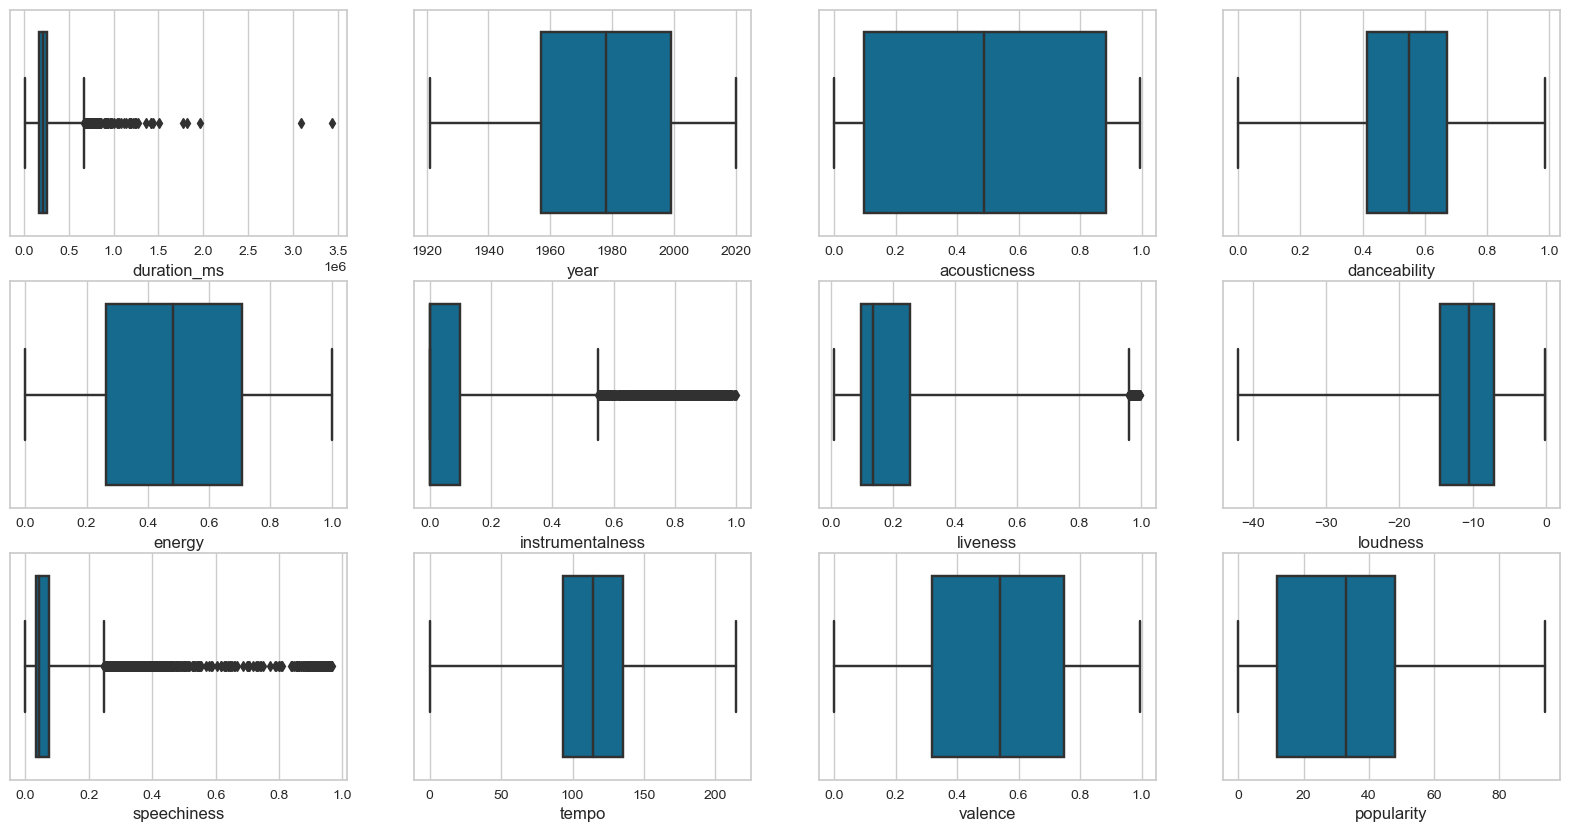

In [106]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for column, ax in zip(to_scale.columns, axes.flat):
    sns.boxplot(sampled_df, x = column, whis = 4.5, ax = ax)
plt.show()

<font color = "royalblue">It is not unheard of for tracks to lst more than 50 minutes. Additionally, a quick internet search reavealed that these tracks are indeed that long. For now they will be left as is. However, the 2 next outliers had a rather obviously negative effect on the clustering process and will thus be removed.<font>

In [107]:
sampled_df.loc[sampled_df["duration_ms"]>3*1e6]

name        artists  duration_ms  year  acousticness  \
2304   Aladdin - Storyteller  'Chuck Riley'      3432107  2004         0.776   
3977  Yalle Kan Yshgek Anene  'Umm Kulthum'      3089255  1949         0.983   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
2304         0.532   0.307             0.000     0.116   -20.451       0.9210   
3977         0.396   0.347             0.558     0.949   -11.557       0.0675   

        tempo  valence mode key  popularity explicit  
2304   77.781    0.443    1   0          41        0  
3977  113.761    0.327    1   3           0        0

In [108]:
# Applying to main df
Q1 = to_scale['duration_ms'].quantile(0.25)
Q3 = to_scale['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 19 * IQR
upper_bound = Q3 + 19 * IQR
sampled_df = sampled_df[(sampled_df['duration_ms'] >= lower_bound) & (sampled_df['duration_ms'] <= upper_bound)].reset_index(drop=True)
sampled_df.shape

(9994, 17)

## <font color = "lightseagreen">3. KMeans clustering<font>

#### <font color = "royalblue">Moving on, it is important to scale and normalise the data before they are fed to algorithms such as KMeans. 2 dataframes will be used, one with standardized numerical features and one with log-transformed.<font>

### <font color = "royalblue">KMeans: Standardized data<font>

In [109]:
numericals = sampled_df.select_dtypes(include=np.number)
sample_stand = StandardScaler().fit_transform(numericals)
sample_stand = pd.DataFrame(sample_stand, columns= numericals.columns)
sample_stand

duration_ms      year  acousticness  danceability    energy  \
0        0.437195  1.512517     -1.222667      1.179842  0.865595   
1       -0.134902 -0.831203      0.522498      0.244071 -1.539348   
2        0.729814  1.043773     -1.143063      2.222720  0.577287   
3       -0.391294 -1.924939      1.337174     -0.156169 -1.328546   
4        0.278400  0.692215      0.360095      0.864160  0.416283   
...           ...       ...           ...           ...       ...   
9989     0.023172  0.809401     -0.792699      1.038913  1.445957   
9990     1.789889 -0.479645      0.234965     -1.108852  0.300211   
9991    -0.474326 -1.846815      1.337174     -0.821356 -0.370013   
9992    -0.472849 -1.182761      1.337174     -0.161806 -1.002795   
9993     0.363986  0.770339      1.257304     -1.148312 -0.965352   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0            -0.530308  0.293238  0.722281     0.047488  0.465470  0.362901   
1            -0.530308 -0.567587 -1.168512    -0.406080 -0.067534 -0.627022   
2            -0.530281 -0.539456  1.300557     0.558771 -0.647969  0.711840   
3            -0.530308  0.889627 -0.207804    -0.361945 -1.186532  0.374280   
4            -0.475775 -0.759445  0.291422    -0.338860  1.676170  1.216284   
...                ...       ...       ...          ...       ...       ...   
9989         -0.513018 -0.673925  0.968333    -0.006152 -0.810617  1.189734   
9990         -0.530308 -0.614848 -0.066796    -0.172506 -0.890740 -0.520824   
9991          0.656593 -0.387545  0.023827    -0.365340 -0.047240 -0.551166   
9992          2.452984  1.317227  0.135993    -0.364661 -0.087006  0.837003   
9993         -0.530258  0.557675 -0.668929    -0.292688  0.436131 -0.725635   

      popularity  
0       0.949071  
1      -1.141746  
2       0.856145  
3      -1.466984  
4       0.856145  
...          ...  
9989    0.205669  
9990    0.623832  
9991   -1.466984  
9992   -1.466984  
9993    0.530907  

[9994 rows x 12 columns]

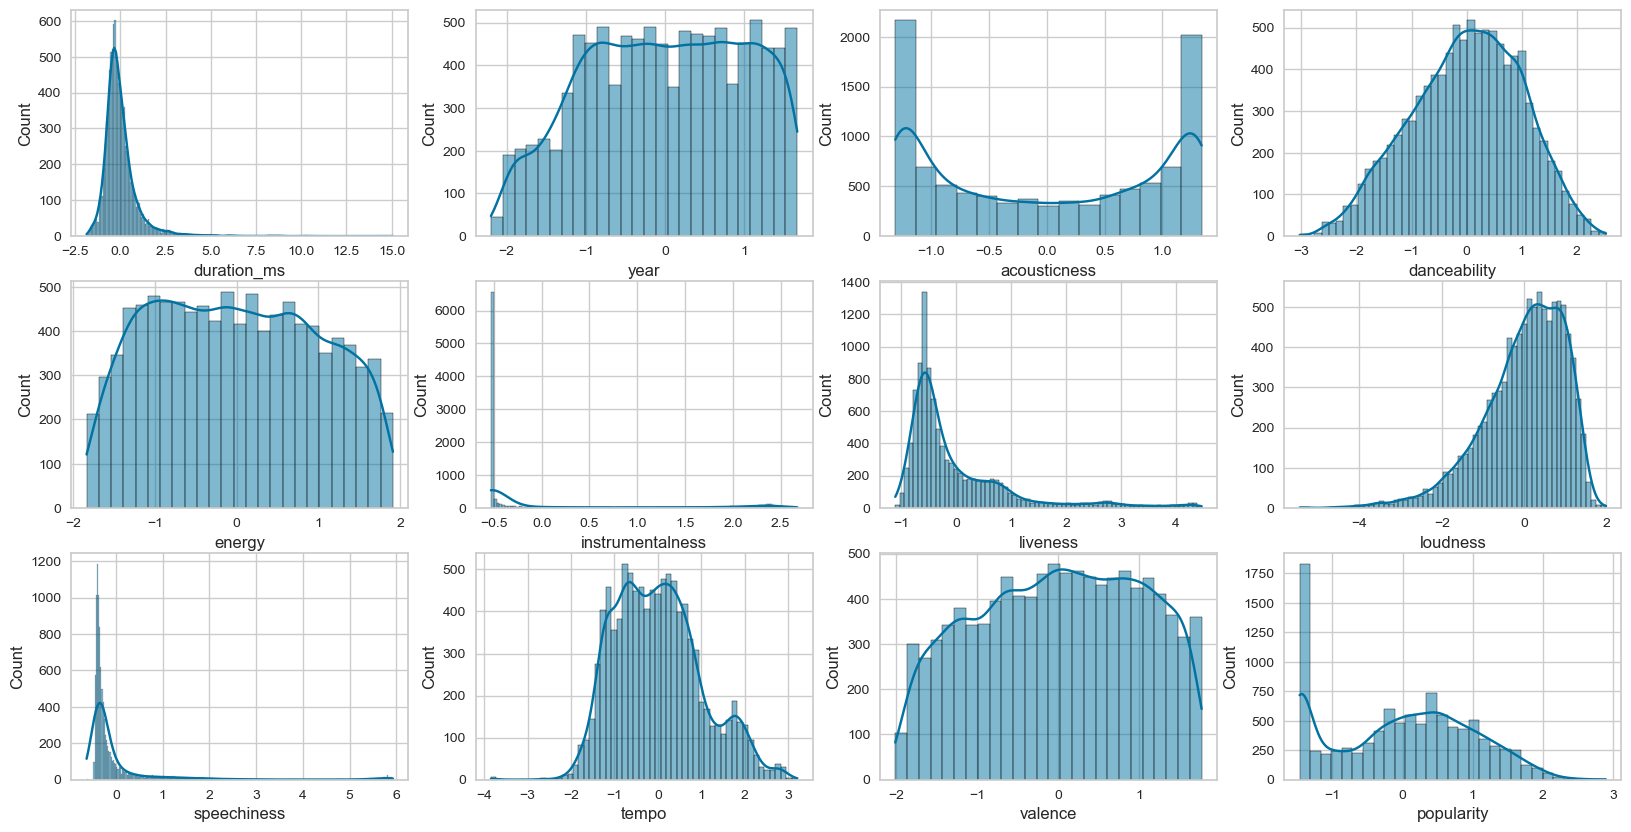

In [110]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for column, ax in zip(sample_stand.columns, axes.flat):
    sns.histplot(sample_stand[column], kde = True, ax = ax)
plt.show()

In [111]:
# iterating on kmeans values to decide which k is the best to use
K = range(2, 22)
inertia_stand = []

for k in K:
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
    kmeans.fit(sample_stand.select_dtypes(include=np.number))
    inertia_stand.append(kmeans.inertia_)

inertia_stand

[90279.55709607707,
 81774.90367179061,
 74368.83691198369,
 69237.01632675972,
 64568.54805822916,
 60570.63835261613,
 57461.83668644405,
 54839.784892633594,
 52568.68596375933,
 50570.58814151584,
 49156.940920177105,
 47905.474325025185,
 46924.36323498427,
 45927.27564468678,
 44982.37170006474,
 44233.67521905144,
 43297.06433501674,
 42698.715780380946,
 42022.198662913084,
 41351.74753917776]

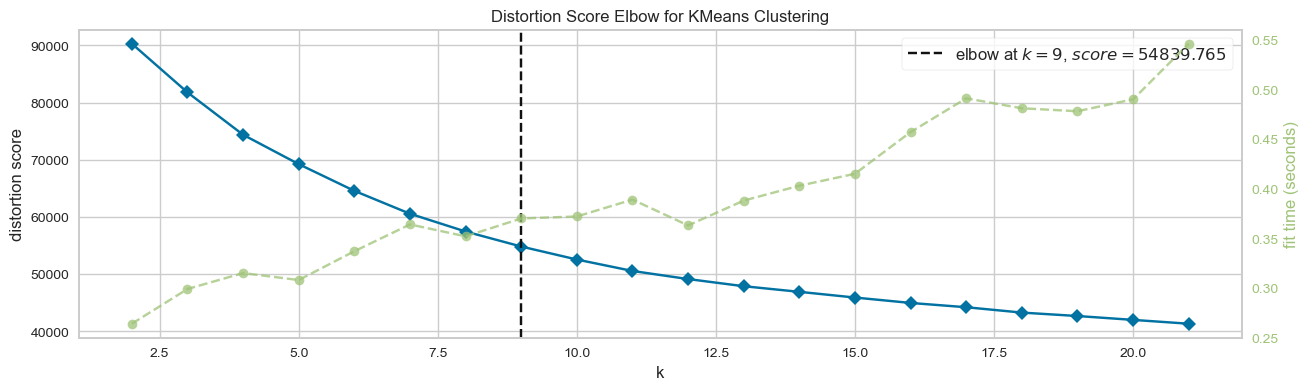

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
visualizer = KElbowVisualizer(kmeans, k=K)

visualizer.fit(sample_stand.select_dtypes(include=np.number))
visualizer.poof()

In [113]:
i = 2

for k in K:
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
    kmeans.fit(sample_stand)
    clusters = kmeans.predict(sample_stand)
    score = silhouette_score(sample_stand, kmeans.labels_, metric='euclidean')
    print(i, "Silhouette Score", "%.3f" % score)
    i += 1

2 Silhouette Score 0.247
3 Silhouette Score 0.205
4 Silhouette Score 0.191
5 Silhouette Score 0.150
6 Silhouette Score 0.191
7 Silhouette Score 0.150
8 Silhouette Score 0.155
9 Silhouette Score 0.146
10 Silhouette Score 0.142
11 Silhouette Score 0.145
12 Silhouette Score 0.142
13 Silhouette Score 0.141
14 Silhouette Score 0.147
15 Silhouette Score 0.138
16 Silhouette Score 0.133
17 Silhouette Score 0.133
18 Silhouette Score 0.136
19 Silhouette Score 0.128
20 Silhouette Score 0.129
21 Silhouette Score 0.131


In [114]:
#### *function for iterating on kmeans with different values for k and generating silhouette and cluster plots for each iteration* ####
""" code copied and adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html """

def compare_n_clusters(K, numericals, X_2D):
    for k in K:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        plt.rcParams["figure.figsize"] = (15, 4)
        plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

    # instansiating kmeans
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init = 10, random_state=42)
    # storing clusters
        clusters = kmeans.fit_predict(numericals)

    # silhouette score for k
        silhouette_avg = silhouette_score(numericals, clusters)
        print(f"Average Silhouette Score for {k} clusters:", round(silhouette_avg, 3))
    # calculating silhouette score for each sample (pair)
        sample_silhouette_values = silhouette_samples(numericals, clusters) # (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)

        y_lower = 10
        for i in range(k):
        # aggregating silhouette scores for samples of cluster i and sorting them (adding them to graph step by step)
            ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
            ith_cluster_silhouette_values.sort()
        # size of each cluster on x-axis defined by y_lower and y_upper
            size_cluster_i = ith_cluster_silhouette_values.shape[0]

            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
        # see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_betweenx.html for more info on .fillbetween()
            ax1.fill_betweenx(
                y = np.arange(y_lower, y_upper),
                x1 = 0,
                x2 = ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

        # to label the silhouette plots with their cluster numbers at the middle on y-axis
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # computing new y_lower for next plot (this will not allow the plots to overlap)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title(f"Silhouette plot for {k} clusters.")
        ax1.set_xlabel("Silhouette coefficient value")
        ax1.set_ylabel("Cluster label")

    # line representing overall average silhouette score
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    #ax1.set_yticks([])  #  to clear the yaxis labels / ticks

    # to create second plot in same row depicting actual clusters formed
        colors = cm.nipy_spectral(clusters.astype(float) / k)
        cluster_labels = np.unique(clusters)
        ax2.scatter(X_2D[:, 0] , X_2D[:, 1] , marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

    # labeling clusters
        centers = kmeans.cluster_centers_
    # drawing white circles at centroid location
        ax2.scatter(
            x = centers[:, 0],
            y = centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("Visualization of clustered data")
        ax2.set_xlabel("Feature space for 1st feature")
        ax2.set_ylabel("Feature space for 2nd feature")

        plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {k}",
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [115]:
# Principal component analysis
pca = PCA(2) 
X_2D_stand = pca.fit_transform(sample_stand)
X_2D_stand

array([[-2.67522957,  0.11401068],
       [ 2.04939641, -0.37647764],
       [-2.67961882, -0.73675438],
       ...,
       [ 2.46307411, -0.36116116],
       [ 2.47674909, -0.94848501],
       [ 0.89693932,  1.33055013]])

Average Silhouette Score for 5 clusters: 0.15
Average Silhouette Score for 6 clusters: 0.191
Average Silhouette Score for 7 clusters: 0.15
Average Silhouette Score for 8 clusters: 0.155
Average Silhouette Score for 9 clusters: 0.146
Average Silhouette Score for 10 clusters: 0.142
Average Silhouette Score for 11 clusters: 0.145
Average Silhouette Score for 12 clusters: 0.142
Average Silhouette Score for 13 clusters: 0.141


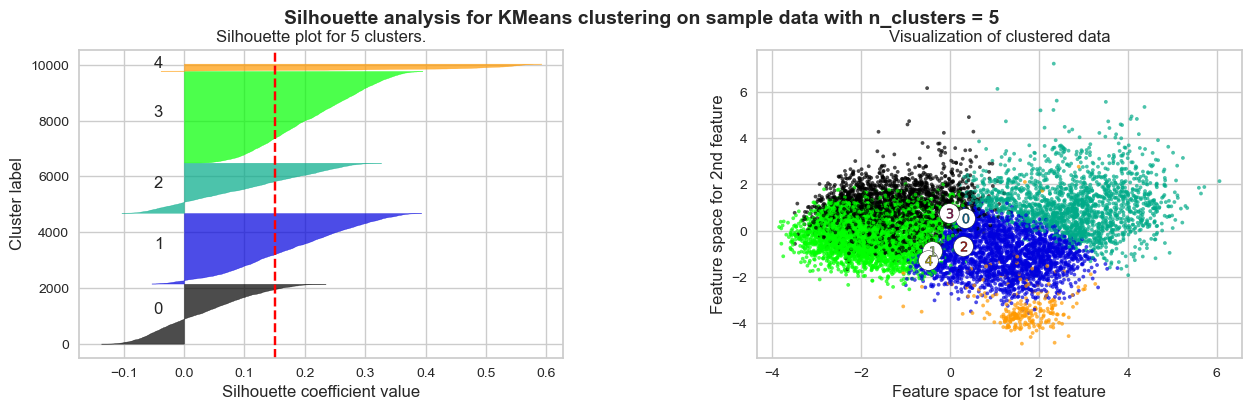

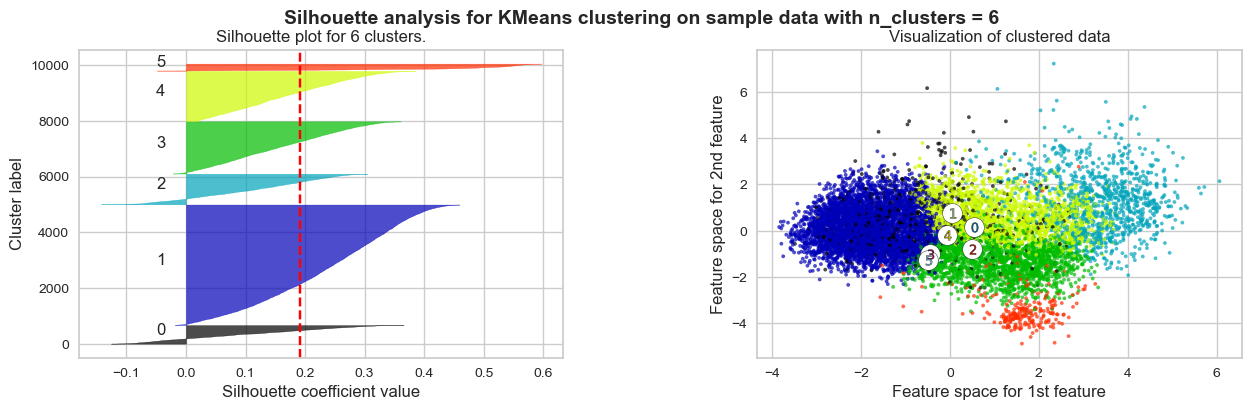

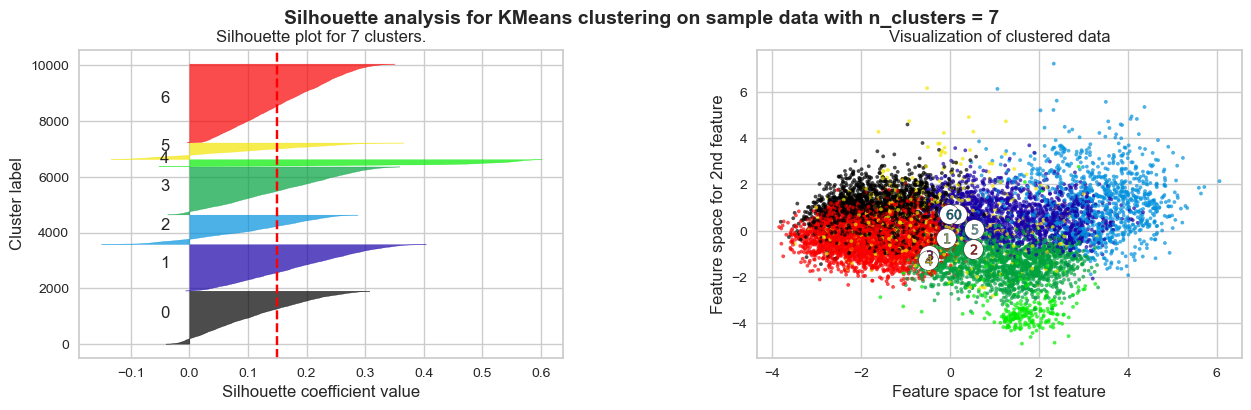

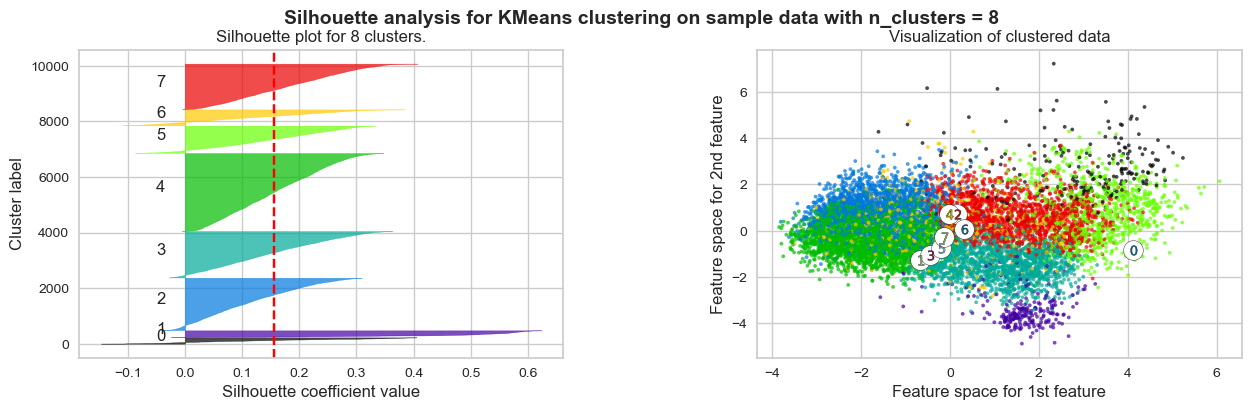

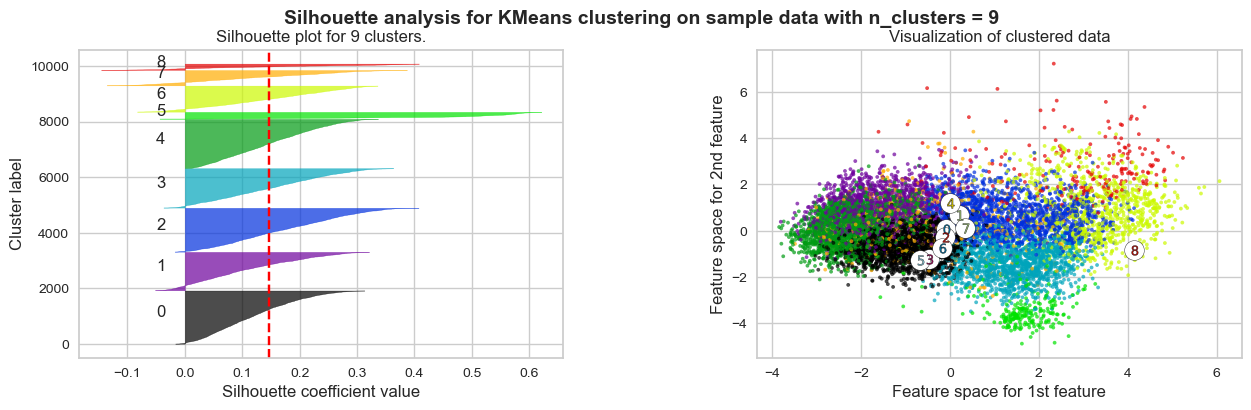

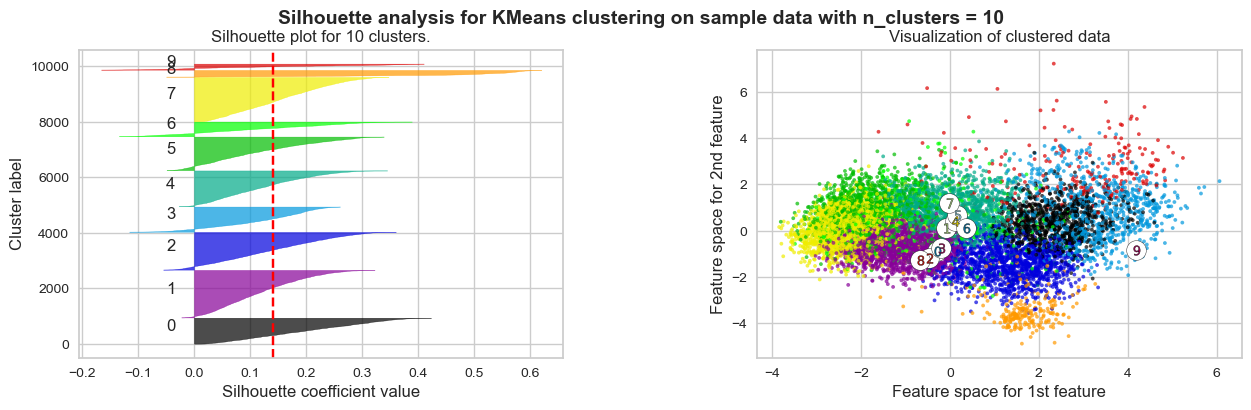

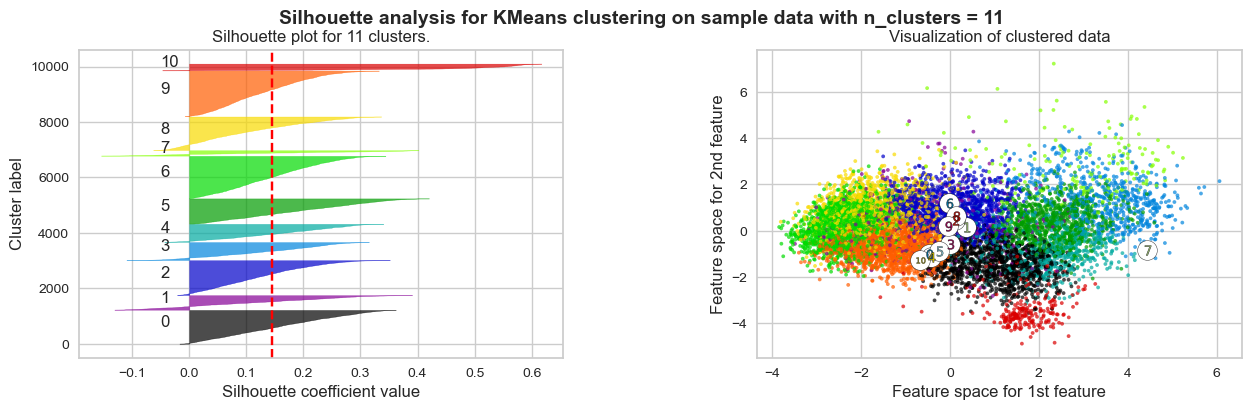

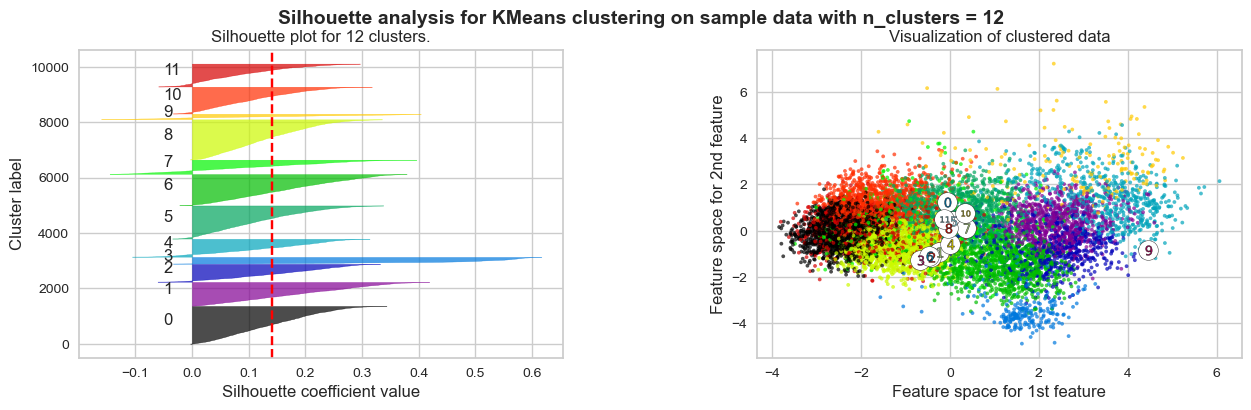

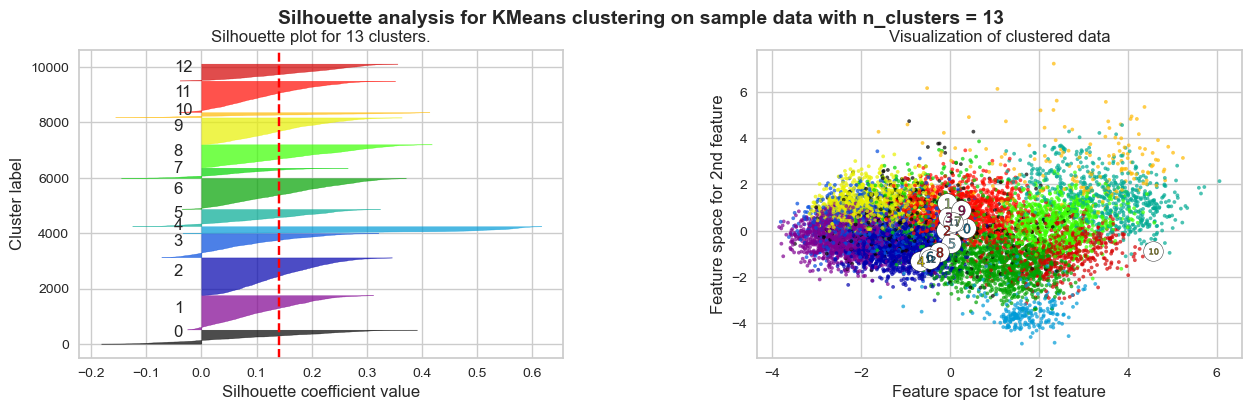

In [116]:
# Applying previous function with a more limited range of k

compare_n_clusters(range(5, 14), sample_stand, X_2D_stand)

<font color = "royalblue">None of the n_clusters values can help produce ideal clusters, as there is a rather profound spillage of datapoints among them. The KElbowVisualizer's suggestion is to use 9 clusters. Looking at the graphs above, the spillage still exists but is relatively limited. If n_clusters = 6, the silhouette score is higher and the clusters seem better defined, but there is considerable spillage of the clusters 0 and 2 into other clusters. So this is a dilemma of whether to pick how many clusters will be spilling into others or how much the clusters will be spilling into others. The tie-breaker could be the observation that with n_clusters = 9 the clusters seem to be relatively better balanced. So this will also be the better option.<font>

### <font color = "royalblue">KMeans: log-transformed data<font>

In [117]:
sampled_df.describe().loc[["min", "mean", "50%", "std", "max"]]

duration_ms         year  acousticness  danceability    energy  \
min   1.593300e+04  1921.000000      0.000000      0.000000  0.000103   
mean  2.317590e+05  1977.279067      0.492745      0.537703  0.489821   
50%   2.091030e+05  1978.000000      0.488000      0.548000  0.481000   
std   1.151419e+05    25.601607      0.375628      0.177403  0.267088   
max   1.967400e+06  2020.000000      0.996000      0.986000  1.000000   

      instrumentalness  liveness   loudness  speechiness       tempo  \
min           0.000000  0.010300 -41.957000     0.000000    0.000000   
mean          0.165316  0.205881 -11.334829     0.092706  116.835257   
50%           0.000222  0.135000 -10.445000     0.044600  114.501500   
std           0.311752  0.177745   5.616973     0.147284   30.404616   
max           0.999000  0.999000  -0.171000     0.966000  214.451000   

       valence  popularity  
min   0.000000    0.000000  
mean  0.529319   31.573444  
50%   0.539000   33.000000  
std   0.263670   21.523772  
max   0.996000   94.000000

In [118]:
numericals_log = numericals.copy()

def log_transfom_clean(x):
    if x != 0:
        x = np.log(x)
        if (x):
            return x
        else:
            return np.NAN
    else:
        return x

for column in numericals_log.columns:
    if column != "loudness":
        numericals_log[column] = list(map(log_transfom_clean, numericals_log[column]))
        numericals_log[column] = numericals_log[column].fillna(np.mean(numericals_log[column]))
    # loudness only has negative values (direct log=transformation is not an option) is only slightly skewed to the left.  Since log-transformations essentially is the inverse of the exponent function, using its absolute values
    # would result in a distribution with the opposite skewnes of what would be expected. In an attempt to account for that, its log-transformed absolute values will be subtracted from the minimal value, resulting in the skeweness
    # that would otherwise be expected and again exclusively negative values
    else:
        numericals_log[column] = list(map(log_transfom_clean, abs(numericals_log[column])))
        numericals_log[column] = numericals_log[column].fillna(np.mean(numericals_log[column]))
        numericals_log[column] = min(numericals_log[column]) - numericals_log[column]

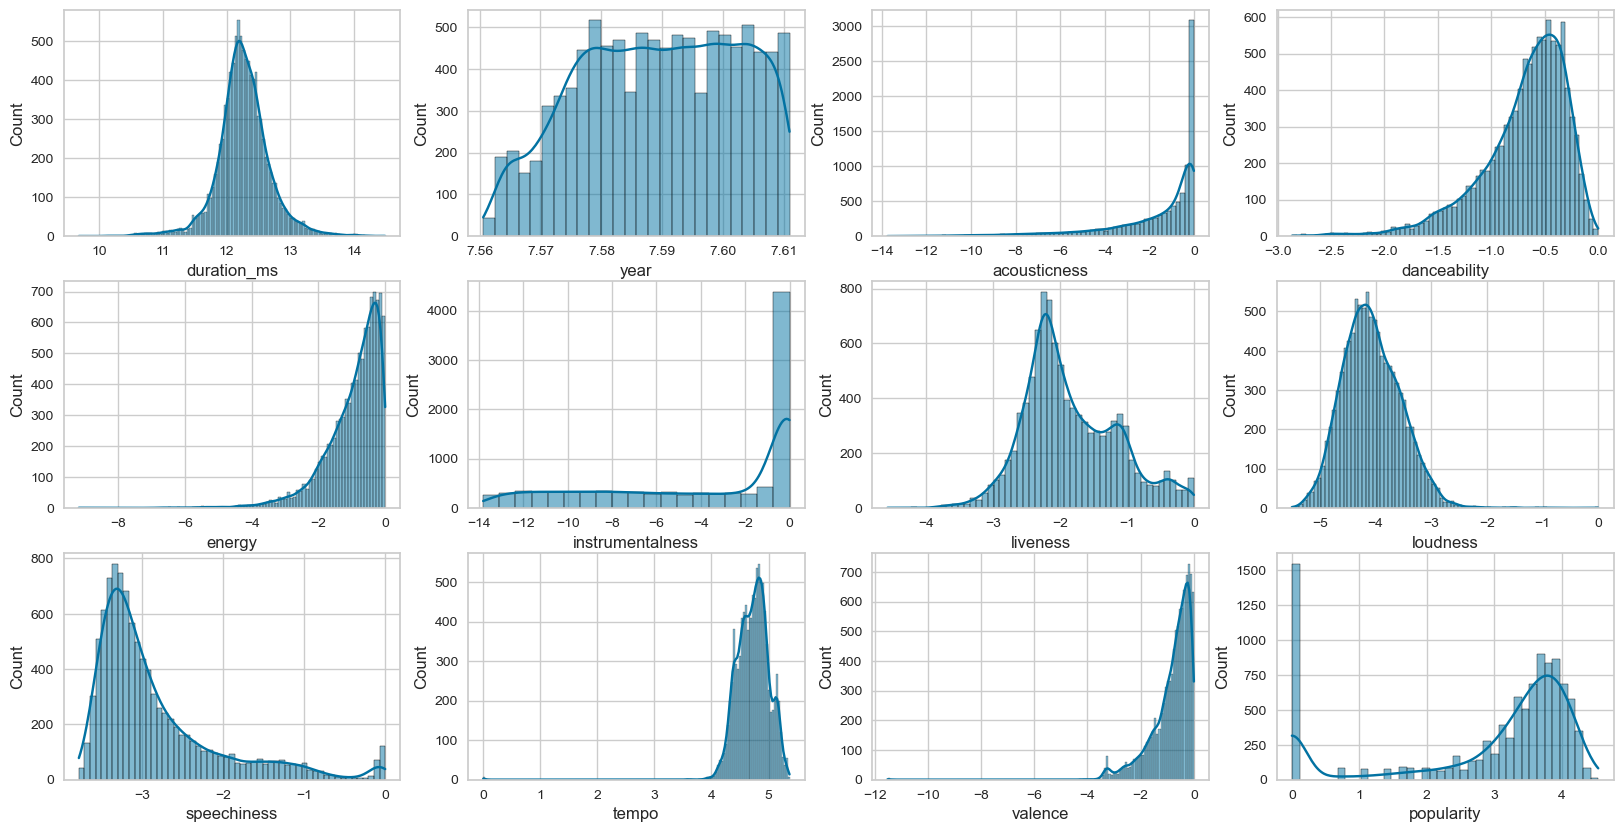

In [119]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for column, ax in zip(numericals_log.columns, axes.flat):
    sns.histplot(numericals_log[column], kde = True, ax = ax)
plt.show()

In [120]:
# iterating on kmeans values to decide which one is the best to use
K = range(2, 22)
inertia_log = []

for k in K:
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
    kmeans.fit(numericals_log.select_dtypes(include=np.number))
    inertia_log.append(kmeans.inertia_)

inertia_log

[132192.4584378509,
 106088.58424191746,
 87268.36980328608,
 75040.48591070034,
 66174.86314873474,
 61060.75786213522,
 56409.94795495586,
 53346.52282656719,
 50461.331233750534,
 47675.92228910634,
 45626.880683610405,
 43965.52915057136,
 42438.557172932095,
 41000.419329648656,
 39558.03828153395,
 38728.13359760354,
 37391.556637180445,
 36543.13586649796,
 35612.37181341975,
 34775.3303448387]

In [121]:
i = 2

for k in K:
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
    kmeans.fit(numericals_log)
    clusters = kmeans.predict(numericals_log)
    score = silhouette_score(numericals_log, kmeans.labels_, metric='euclidean')
    print(i, "Silhouette Score", "%.3f" % score)
    i += 1

2 Silhouette Score 0.494
3 Silhouette Score 0.408
4 Silhouette Score 0.354
5 Silhouette Score 0.301
6 Silhouette Score 0.308
7 Silhouette Score 0.284
8 Silhouette Score 0.254
9 Silhouette Score 0.256
10 Silhouette Score 0.250
11 Silhouette Score 0.252
12 Silhouette Score 0.252
13 Silhouette Score 0.250
14 Silhouette Score 0.238
15 Silhouette Score 0.221
16 Silhouette Score 0.223
17 Silhouette Score 0.204
18 Silhouette Score 0.224
19 Silhouette Score 0.220
20 Silhouette Score 0.215
21 Silhouette Score 0.195


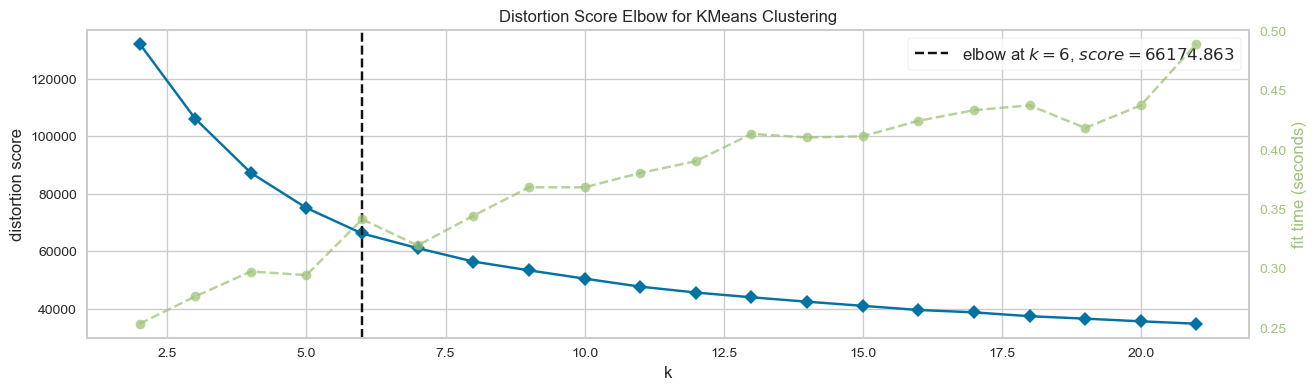

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [122]:
visualizer = KElbowVisualizer(kmeans, k=K)

visualizer.fit(numericals_log.select_dtypes(include=np.number))
visualizer.poof()

In [123]:
# Principal component analysis (resulting array will be needed in next cell)
pca = PCA(2) 
X_2D_log = pca.fit_transform(numericals_log)
X_2D_log

array([[-3.93002456,  2.42602249],
       [-4.24287314, -1.62198914],
       [ 7.66836827,  1.11183417],
       ...,
       [-3.32480156, -2.2613212 ],
       [-4.24881316, -2.28052738],
       [ 6.8875812 , -1.83351649]])

Average Silhouette Score for 4 clusters: 0.354
Average Silhouette Score for 5 clusters: 0.301
Average Silhouette Score for 6 clusters: 0.308
Average Silhouette Score for 7 clusters: 0.284
Average Silhouette Score for 8 clusters: 0.254
Average Silhouette Score for 9 clusters: 0.256


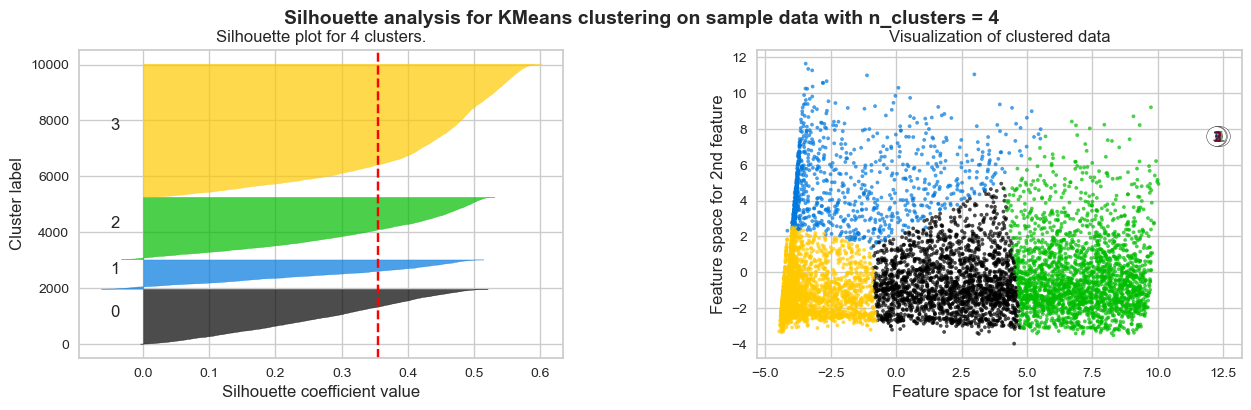

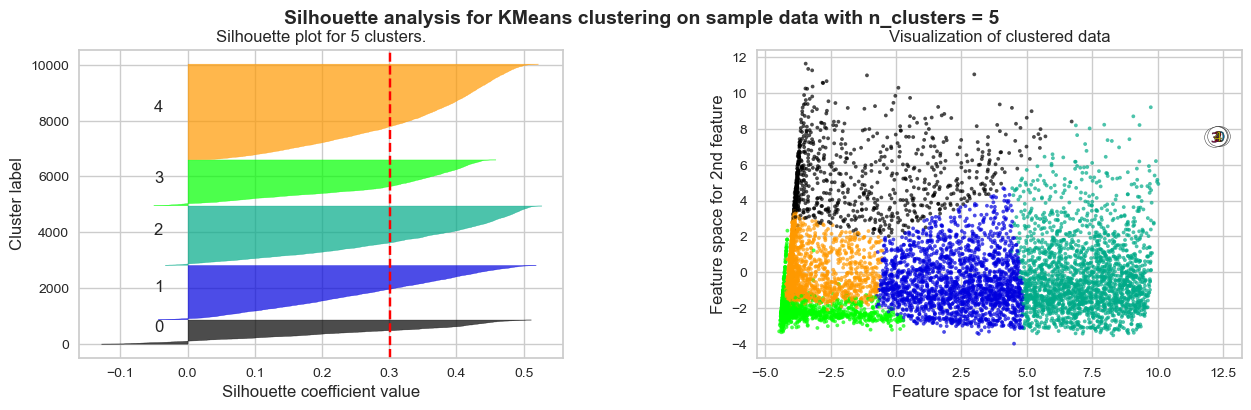

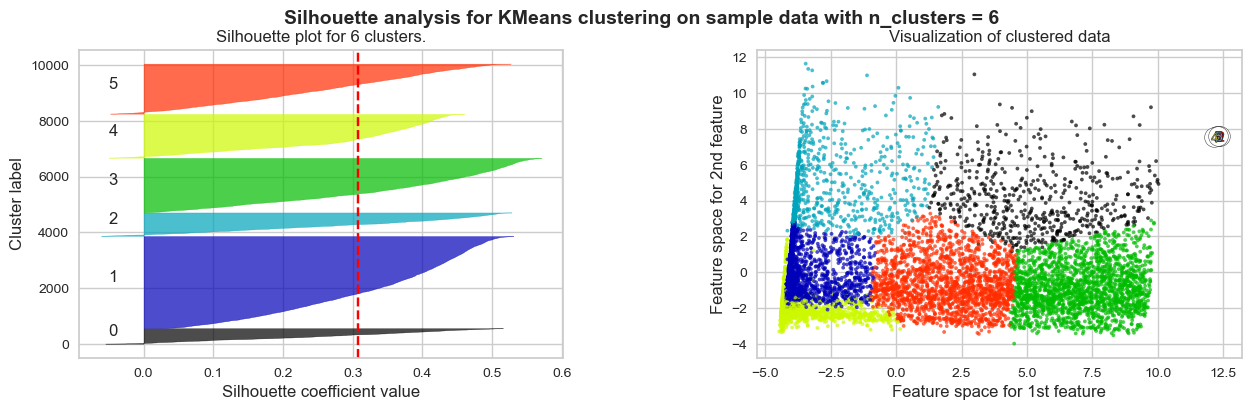

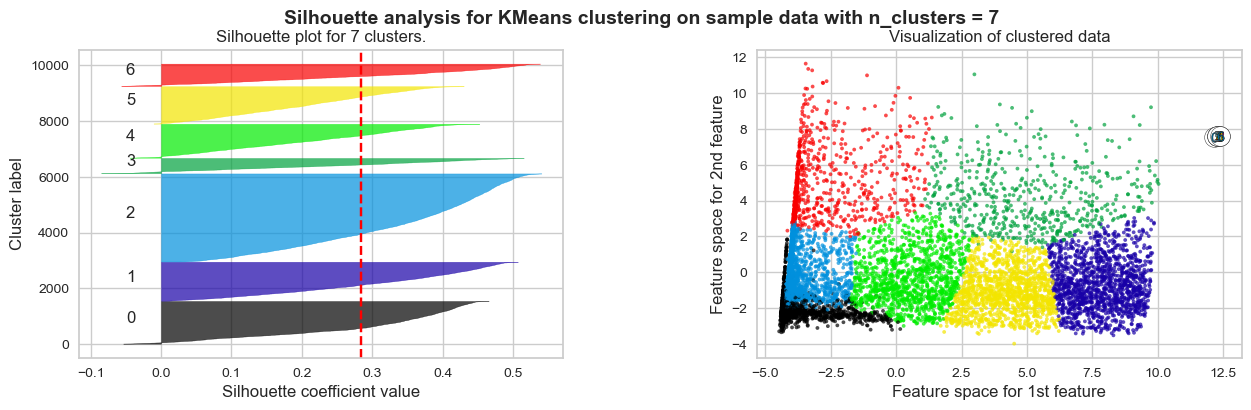

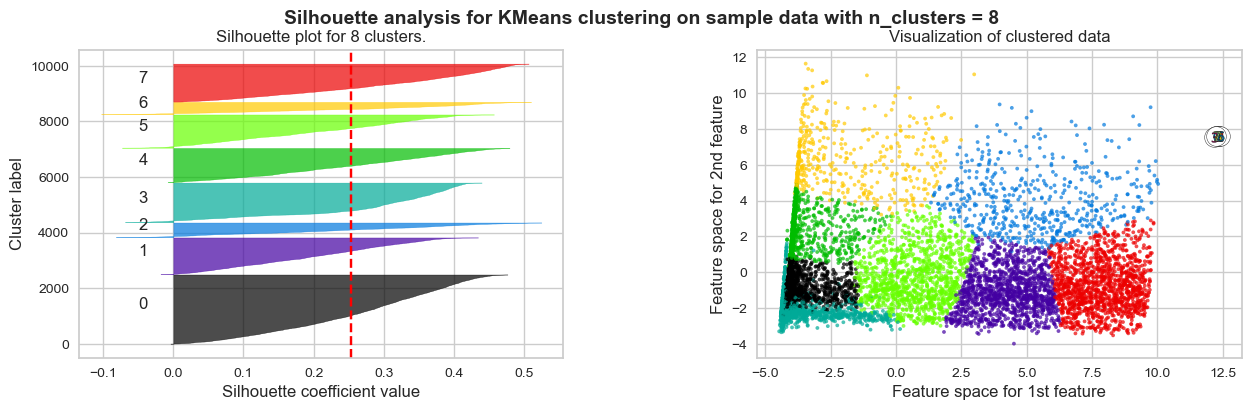

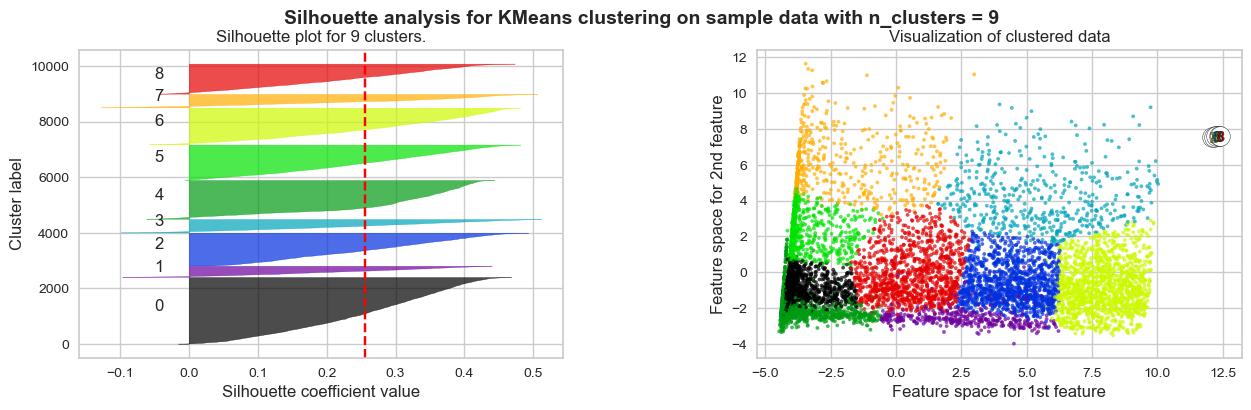

In [124]:
compare_n_clusters(range(4, 10), numericals_log, X_2D_log)

<font color = "royalblue">KElbowVisualizer's suggestion is to use n_clusters = 6, which offers silhouette score = 0.308. However, if n_clusters = 4, the clusters would be much better defined, with very few data points spilling from clusters 0, 1 and 2.Thinking about the objective of creating a good music predictor, it does not seem right to only have 4 clusters for the music and the difference between the 2 options in terms of their silhouette score is 0.046. It seems preferable to use n_clusters = 6. <br>*A peculiar observation can be made when taking a look at the locus of the centroids in all cases. They seem to be extremely close to each other and what is more, they are outliers. Further investigation is required.*<font>

## <font color = "lightseagreen">4. K-prototypes clustering (mixed data)<font>

<font color = "royalblue">As pointed out on https://kprototypes.readthedocs.io/en/latest/api.html#data-preprocessing:
<br>"As k-prototypes only accepts floating-point values for numerical data and integer values for categorical data, any other data type must be properly converted beforehand.
<br> sklearn.preprocessing.StandardScaler is the equivalent for numerical values."<font>

### <font color = "royalblue">K-prototypes: Standardised data<font>

In [125]:
# picking categorical columns
sample_kp = sample_stand.copy()
sample_kp["mode"] = sampled_df["mode"].astype("Int64")
sample_kp["key"] = sampled_df["key"].astype("Int64")
sample_kp["explicit"] = sampled_df["explicit"].astype("Int64")
sample_kp

duration_ms      year  acousticness  danceability    energy  \
0        0.437195  1.512517     -1.222667      1.179842  0.865595   
1       -0.134902 -0.831203      0.522498      0.244071 -1.539348   
2        0.729814  1.043773     -1.143063      2.222720  0.577287   
3       -0.391294 -1.924939      1.337174     -0.156169 -1.328546   
4        0.278400  0.692215      0.360095      0.864160  0.416283   
...           ...       ...           ...           ...       ...   
9989     0.023172  0.809401     -0.792699      1.038913  1.445957   
9990     1.789889 -0.479645      0.234965     -1.108852  0.300211   
9991    -0.474326 -1.846815      1.337174     -0.821356 -0.370013   
9992    -0.472849 -1.182761      1.337174     -0.161806 -1.002795   
9993     0.363986  0.770339      1.257304     -1.148312 -0.965352   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0            -0.530308  0.293238  0.722281     0.047488  0.465470  0.362901   
1            -0.530308 -0.567587 -1.168512    -0.406080 -0.067534 -0.627022   
2            -0.530281 -0.539456  1.300557     0.558771 -0.647969  0.711840   
3            -0.530308  0.889627 -0.207804    -0.361945 -1.186532  0.374280   
4            -0.475775 -0.759445  0.291422    -0.338860  1.676170  1.216284   
...                ...       ...       ...          ...       ...       ...   
9989         -0.513018 -0.673925  0.968333    -0.006152 -0.810617  1.189734   
9990         -0.530308 -0.614848 -0.066796    -0.172506 -0.890740 -0.520824   
9991          0.656593 -0.387545  0.023827    -0.365340 -0.047240 -0.551166   
9992          2.452984  1.317227  0.135993    -0.364661 -0.087006  0.837003   
9993         -0.530258  0.557675 -0.668929    -0.292688  0.436131 -0.725635   

      popularity  mode  key  explicit  
0       0.949071     0    5         1  
1      -1.141746     1    7         0  
2       0.856145     0    9         0  
3      -1.466984     1   10         0  
4       0.856145     1    7         0  
...          ...   ...  ...       ...  
9989    0.205669     1    9         0  
9990    0.623832     1    8         0  
9991   -1.466984     1    9         0  
9992   -1.466984     0    5         0  
9993    0.530907     1    2         0  

[9994 rows x 15 columns]

In [126]:
sample_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       9994 non-null   float64
 1   year              9994 non-null   float64
 2   acousticness      9994 non-null   float64
 3   danceability      9994 non-null   float64
 4   energy            9994 non-null   float64
 5   instrumentalness  9994 non-null   float64
 6   liveness          9994 non-null   float64
 7   loudness          9994 non-null   float64
 8   speechiness       9994 non-null   float64
 9   tempo             9994 non-null   float64
 10  valence           9994 non-null   float64
 11  popularity        9994 non-null   float64
 12  mode              9994 non-null   Int64  
 13  key               9994 non-null   Int64  
 14  explicit          9994 non-null   Int64  
dtypes: Int64(3), float64(12)
memory usage: 1.2 MB


In [127]:
""" default values: .KPrototypes(n_clusters=8, initialization=None, numerical_distance='euclidean', categorical_distance='matching', gamma=None, n_iterations=100, random_state=None, verbose=0) """
# iterating on kmeans values to decide which one is the best to use
""" K = range(2, 16)
i = 0

for k in K:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit(sample_kp, categorical=[12, 13, 14])
    score = silhouette_score(sample_kp, kproto.labels_, metric='euclidean')
    print(i, "Silhouette Score", "%.3f" % score)
    i += 1

# Resulting silhouette scores (commented to avoid the repetition of execution since it is rather time-consuming and they are far from ideal)
2 Silhouette Score 0.140
3 Silhouette Score 0.106
4 Silhouette Score 0.083
5 Silhouette Score 0.097
6 Silhouette Score 0.079
7 Silhouette Score 0.068
8 Silhouette Score 0.070
9 Silhouette Score 0.065
10 Silhouette Score 0.062
11 Silhouette Score 0.061
12 Silhouette Score 0.058
13 Silhouette Score 0.057
14 Silhouette Score 0.055
15 Silhouette Score 0.053
16 Silhouette Score 0.054 """

' K = range(2, 16)\ni = 0\n\nfor k in K:\n    kproto = KPrototypes(n_clusters=k, random_state=42)\n    kproto.fit(sample_kp, categorical=[12, 13, 14])\n    score = silhouette_score(sample_kp, kproto.labels_, metric=\'euclidean\')\n    print(i, "Silhouette Score", "%.3f" % score)\n    i += 1\n\n# Resulting silhouette scores (commented to avoid the repetition of execution since it is rather time-consuming and they are far from ideal)\n2 Silhouette Score 0.140\n3 Silhouette Score 0.106\n4 Silhouette Score 0.083\n5 Silhouette Score 0.097\n6 Silhouette Score 0.079\n7 Silhouette Score 0.068\n8 Silhouette Score 0.070\n9 Silhouette Score 0.065\n10 Silhouette Score 0.062\n11 Silhouette Score 0.061\n12 Silhouette Score 0.058\n13 Silhouette Score 0.057\n14 Silhouette Score 0.055\n15 Silhouette Score 0.053\n16 Silhouette Score 0.054 '

<font color = "royalblue">The resulting clustering was not satisfactory. It would be better to turn to some other method.<font>

### <font color = "royalblue">K-prototypes: log-transformed data<font>

In [128]:
# picking categorical columns
sample_kp_log = numericals_log.copy()
sample_kp_log["mode"] = sampled_df["mode"].astype("Int64")
sample_kp_log["key"] = sampled_df["key"].astype("Int64")
sample_kp_log["explicit"] = sampled_df["explicit"].astype("Int64")
sample_kp_log

duration_ms      year  acousticness  danceability    energy  \
0       12.550003  7.608871     -3.396210     -0.291690 -0.327116   
1       12.284084  7.578657     -0.372514     -0.543005 -2.542112   
2       12.662823  7.602900     -2.758291     -0.070422 -0.440057   
3       12.137296  7.564238     -0.005013     -0.673345 -2.002481   
4       12.482996  7.598399     -0.465215     -0.369615 -0.509160   
...           ...       ...           ...           ...       ...   
9989    12.364900  7.599902     -1.634756     -0.325730 -0.132389   
9990    12.989609  7.583248     -0.543005     -1.075873 -0.562119   
9991    12.084735  7.565275     -0.005013     -0.936493 -0.939048   
9992    12.085694  7.574045     -0.005013     -0.675307 -1.505078   
9993    12.519667  7.599401     -0.035627     -1.096614 -1.461018   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0             0.000000 -1.354796 -3.750948    -2.305590  4.875098 -0.470004   
1             0.000000 -2.253795 -4.650781    -3.414283  4.743035 -1.010601   
2           -11.666077 -2.207275 -3.159858    -1.742969  4.576102 -0.332679   
3             0.000000 -1.010601 -4.291980    -3.233989  4.391494 -0.465215   
4            -4.074542 -2.646485 -4.038011    -3.151217  5.122749 -0.162519   
...                ...       ...       ...          ...       ...       ...   
9989         -5.223210 -2.452246 -3.540366    -2.388143  4.523852 -0.170788   
9990          0.000000 -2.337177 -4.226535    -2.698595  4.497073 -0.936493   
9991         -0.994252 -1.987774 -4.182095    -3.246761  4.748396 -0.957113   
9992         -0.072571 -0.820981 -4.124206    -3.244194  4.737864 -0.287682   
9993        -11.068240 -1.187444 -4.480257    -3.003764  4.868265 -1.084709   

      popularity  mode  key  explicit  
0       3.951244     0    5         1  
1       1.945910     1    7         0  
2       3.912023     0    9         0  
3       0.000000     1   10         0  
4       3.912023     1    7         0  
...          ...   ...  ...       ...  
9989    3.583519     1    9         0  
9990    3.806662     1    8         0  
9991    0.000000     1    9         0  
9992    0.000000     0    5         0  
9993    3.761200     1    2         0  

[9994 rows x 15 columns]

In [129]:
sample_kp_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       9994 non-null   float64
 1   year              9994 non-null   float64
 2   acousticness      9994 non-null   float64
 3   danceability      9994 non-null   float64
 4   energy            9994 non-null   float64
 5   instrumentalness  9994 non-null   float64
 6   liveness          9994 non-null   float64
 7   loudness          9994 non-null   float64
 8   speechiness       9994 non-null   float64
 9   tempo             9994 non-null   float64
 10  valence           9994 non-null   float64
 11  popularity        9994 non-null   float64
 12  mode              9994 non-null   Int64  
 13  key               9994 non-null   Int64  
 14  explicit          9994 non-null   Int64  
dtypes: Int64(3), float64(12)
memory usage: 1.2 MB


In [ ]:
""" default values: .KPrototypes(n_clusters=8, initialization=None, numerical_distance='euclidean', categorical_distance='matching', gamma=None, n_iterations=100, random_state=None, verbose=0) """
# iterating on kmeans values to decide which one is the best to use
""" K = range(2, 22)
i = 2

for k in K:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit(sample_kp_log, categorical=[12, 13, 14])
    score = silhouette_score(sample_kp_log, kproto.labels_, metric='euclidean')
    print(i, "Silhouette Score", "%.3f" % score)
    i += 1


2 Silhouette Score 0.371
3 Silhouette Score 0.281
4 Silhouette Score 0.221
5 Silhouette Score 0.164
6 Silhouette Score 0.166
7 Silhouette Score 0.143
8 Silhouette Score 0.121
9 Silhouette Score 0.122
10 Silhouette Score 0.118
11 Silhouette Score 0.112
12 Silhouette Score 0.111
13 Silhouette Score 0.102
14 Silhouette Score 0.101
15 Silhouette Score 0.100
16 Silhouette Score 0.099 """

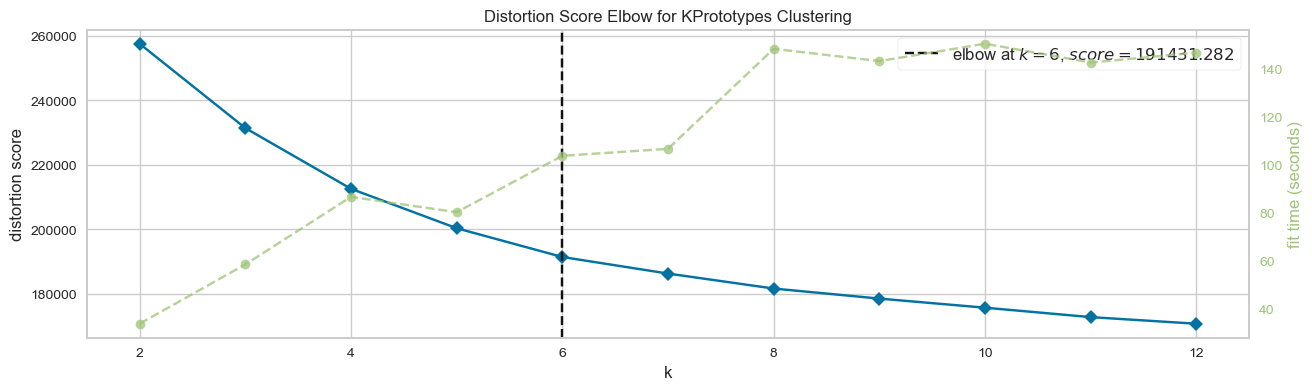

<Axes: title={'center': 'Distortion Score Elbow for KPrototypes Clustering'}, xlabel='k', ylabel='distortion score'>

In [130]:
""" kproto = KPrototypes(n_clusters=k, random_state=42)

visualizer = KElbowVisualizer(kproto, k=range(2,13))

visualizer.fit(sample_kp_log, categorical=[12, 13, 14])
visualizer.poof() """

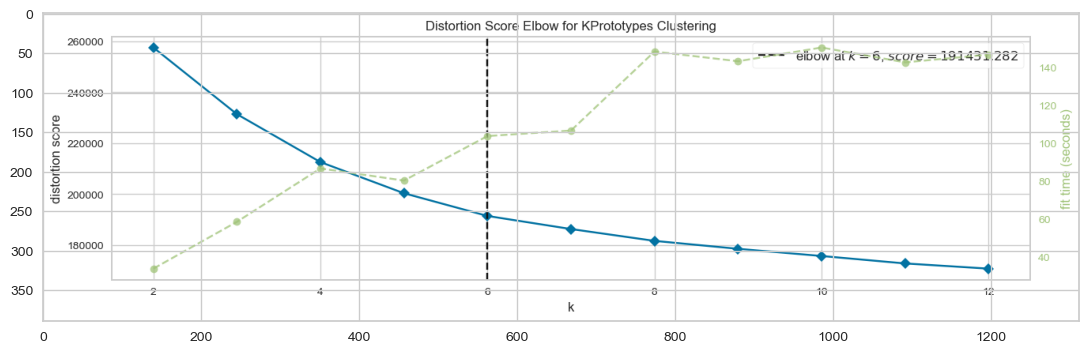

In [132]:
# to save time the resulting graph was saved in .png and imported
img = mpimg.imread("sample_kp_log_elbowviz.png")
plt.imshow(img)

<font color = "royalblue">Once again, the silhouette scores weren't particularly high. With n_clusters 6, as the visualizer suggests, the silhouette score is 0.166, while in the case of KMeans with log-transformed data it was 0.308 for n_clusters =6, which was decided that would be the better choice. The music recommender will be built based on log-transformed data, using the KMeans algorithm and n_clusters = 6.<font>

## <font color = "lightseagreen">5. Music recommender<font>

In [136]:
# creating final_df
miss_col = sampled_df.select_dtypes(include=np.object0)
full_df = pd.concat([miss_col, numericals_log], axis = 1)
full_df

name  \
0                             Going Through Some Thangs   
1                                     Mountain Greenery   
2                                        Guns Are Drawn   
3                                    High Sheriff Blues   
4     I'll Remember (Theme from the Motion Picture W...   
...                                                 ...   
9989                          Before You Hit The Ground   
9990                A Love Supreme, Pt. II - Resolution   
9991                      Den ehis tipota, ma ehis kati   
9992                      Jao Jao Mere Jivan Ke Ujiyare   
9993                                             Volare   

                                                artists mode key explicit  \
0                                         'Yella Beezy'    0   5        1   
1                        'Bing Crosby', 'Buddy Bregman'    1   7        0   
2                             'The Roots', 'Son Little'    0   9        0   
3                                      'Charley Patton'    1  10        0   
4                                             'Madonna'    1   7        0   
...                                                 ...  ...  ..      ...   
9989                                       'Jonny Lang'    1   9        0   
9990                                    'John Coltrane'    1   8        0   
9991                                      'Sofia Vempo'    1   9        0   
9992                                 'Lalita Dewoolkar'    0   5        0   
9993  'Luciano Pavarotti', 'Orchestra del Teatro Com...    1   2        0   

      duration_ms      year  acousticness  danceability    energy  \
0       12.550003  7.608871     -3.396210     -0.291690 -0.327116   
1       12.284084  7.578657     -0.372514     -0.543005 -2.542112   
2       12.662823  7.602900     -2.758291     -0.070422 -0.440057   
3       12.137296  7.564238     -0.005013     -0.673345 -2.002481   
4       12.482996  7.598399     -0.465215     -0.369615 -0.509160   
...           ...       ...           ...           ...       ...   
9989    12.364900  7.599902     -1.634756     -0.325730 -0.132389   
9990    12.989609  7.583248     -0.543005     -1.075873 -0.562119   
9991    12.084735  7.565275     -0.005013     -0.936493 -0.939048   
9992    12.085694  7.574045     -0.005013     -0.675307 -1.505078   
9993    12.519667  7.599401     -0.035627     -1.096614 -1.461018   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0             0.000000 -1.354796 -3.750948    -2.305590  4.875098 -0.470004   
1             0.000000 -2.253795 -4.650781    -3.414283  4.743035 -1.010601   
2           -11.666077 -2.207275 -3.159858    -1.742969  4.576102 -0.332679   
3             0.000000 -1.010601 -4.291980    -3.233989  4.391494 -0.465215   
4            -4.074542 -2.646485 -4.038011    -3.151217  5.122749 -0.162519   
...                ...       ...       ...          ...       ...       ...   
9989         -5.223210 -2.452246 -3.540366    -2.388143  4.523852 -0.170788   
9990          0.000000 -2.337177 -4.226535    -2.698595  4.497073 -0.936493   
9991         -0.994252 -1.987774 -4.182095    -3.246761  4.748396 -0.957113   
9992         -0.072571 -0.820981 -4.124206    -3.244194  4.737864 -0.287682   
9993        -11.068240 -1.187444 -4.480257    -3.003764  4.868265 -1.084709   

      popularity  
0       3.951244  
1       1.945910  
2       3.912023  
3       0.000000  
4       3.912023  
...          ...  
9989    3.583519  
9990    3.806662  
9991    0.000000  
9992    0.000000  
9993    3.761200  

[9994 rows x 17 columns]

In [135]:
# training model/predicting clusters
kmeans = KMeans(n_clusters=6, init='k-means++', n_init = 10, random_state=42)
kmeans.fit(numericals_log)
clusters = kmeans.predict(numericals_log)
pd.Series(clusters).value_counts()

1    3295
3    1946
5    1794
4    1568
2     837
0     554
dtype: int64

In [139]:
# finalizing dataset by assigning clusters
full_df['cluster'] = clusters
final_df = full_df.copy()
final_df

name  \
0                             Going Through Some Thangs   
1                                     Mountain Greenery   
2                                        Guns Are Drawn   
3                                    High Sheriff Blues   
4     I'll Remember (Theme from the Motion Picture W...   
...                                                 ...   
9989                          Before You Hit The Ground   
9990                A Love Supreme, Pt. II - Resolution   
9991                      Den ehis tipota, ma ehis kati   
9992                      Jao Jao Mere Jivan Ke Ujiyare   
9993                                             Volare   

                                                artists mode key explicit  \
0                                         'Yella Beezy'    0   5        1   
1                        'Bing Crosby', 'Buddy Bregman'    1   7        0   
2                             'The Roots', 'Son Little'    0   9        0   
3                                      'Charley Patton'    1  10        0   
4                                             'Madonna'    1   7        0   
...                                                 ...  ...  ..      ...   
9989                                       'Jonny Lang'    1   9        0   
9990                                    'John Coltrane'    1   8        0   
9991                                      'Sofia Vempo'    1   9        0   
9992                                 'Lalita Dewoolkar'    0   5        0   
9993  'Luciano Pavarotti', 'Orchestra del Teatro Com...    1   2        0   

      duration_ms      year  acousticness  danceability    energy  \
0       12.550003  7.608871     -3.396210     -0.291690 -0.327116   
1       12.284084  7.578657     -0.372514     -0.543005 -2.542112   
2       12.662823  7.602900     -2.758291     -0.070422 -0.440057   
3       12.137296  7.564238     -0.005013     -0.673345 -2.002481   
4       12.482996  7.598399     -0.465215     -0.369615 -0.509160   
...           ...       ...           ...           ...       ...   
9989    12.364900  7.599902     -1.634756     -0.325730 -0.132389   
9990    12.989609  7.583248     -0.543005     -1.075873 -0.562119   
9991    12.084735  7.565275     -0.005013     -0.936493 -0.939048   
9992    12.085694  7.574045     -0.005013     -0.675307 -1.505078   
9993    12.519667  7.599401     -0.035627     -1.096614 -1.461018   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0             0.000000 -1.354796 -3.750948    -2.305590  4.875098 -0.470004   
1             0.000000 -2.253795 -4.650781    -3.414283  4.743035 -1.010601   
2           -11.666077 -2.207275 -3.159858    -1.742969  4.576102 -0.332679   
3             0.000000 -1.010601 -4.291980    -3.233989  4.391494 -0.465215   
4            -4.074542 -2.646485 -4.038011    -3.151217  5.122749 -0.162519   
...                ...       ...       ...          ...       ...       ...   
9989         -5.223210 -2.452246 -3.540366    -2.388143  4.523852 -0.170788   
9990          0.000000 -2.337177 -4.226535    -2.698595  4.497073 -0.936493   
9991         -0.994252 -1.987774 -4.182095    -3.246761  4.748396 -0.957113   
9992         -0.072571 -0.820981 -4.124206    -3.244194  4.737864 -0.287682   
9993        -11.068240 -1.187444 -4.480257    -3.003764  4.868265 -1.084709   

      popularity  cluster  
0       3.951244        1  
1       1.945910        4  
2       3.912023        3  
3       0.000000        4  
4       3.912023        5  
...          ...      ...  
9989    3.583519        5  
9990    3.806662        1  
9991    0.000000        4  
9992    0.000000        4  
9993    3.761200        3  

[9994 rows x 18 columns]

In [140]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9994 non-null   object 
 1   artists           9994 non-null   object 
 2   mode              9994 non-null   object 
 3   key               9994 non-null   object 
 4   explicit          9994 non-null   object 
 5   duration_ms       9994 non-null   float64
 6   year              9994 non-null   float64
 7   acousticness      9994 non-null   float64
 8   danceability      9994 non-null   float64
 9   energy            9994 non-null   float64
 10  instrumentalness  9994 non-null   float64
 11  liveness          9994 non-null   float64
 12  loudness          9994 non-null   float64
 13  speechiness       9994 non-null   float64
 14  tempo             9994 non-null   float64
 15  valence           9994 non-null   float64
 16  popularity        9994 non-null   float64


In [153]:
# creating function for music recommendation (strongly based on Xisca's paradigm)

def music_recommender():
    # asking user to input song title
    song_name = input('Choose a song: ')
    results = sp.search(q=f'track:{song_name}', limit=1)
    track_id = results['tracks']['items'][0]['id']

    # getting features of inputted song
    audio_features = sp.audio_features(track_id)

    # storing new track into its own df
    input_df = pd.DataFrame(audio_features)
    new_features = input_df[numericals_log.columns]

    # normalising features
    new_feats_to_scale = new_features.select_dtypes(np.number)
    
    for column in new_feats_to_scale.columns:
        if column != "loudness":
            new_feats_to_scale[column] = list(map(log_transfom_clean, new_feats_to_scale[column]))
            new_feats_to_scale[column] = new_feats_to_scale[column].fillna(np.mean(new_feats_to_scale[column]))
        else:
            new_feats_to_scale[column] = list(map(log_transfom_clean, abs(new_feats_to_scale[column])))
            new_feats_to_scale[column] = new_feats_to_scale[column].fillna(np.mean(new_feats_to_scale[column]))
            new_feats_to_scale[column] = min(new_feats_to_scale[column]) - new_feats_to_scale[column]
    
    new_cat = new_features.select_dtypes(np.object0)
    new_features_scaled = pd.concat([new_cat, new_feats_to_scale], axis = 1)

    # cluster prediction
    cluster = kmeans.predict(new_features_scaled)

    # using only part of final_df that corresponds to predicted cluster
    filtered_df = final_df[final_df['cluster'] == cluster[0]][numericals_log.columns]

    # get closest song from filtered dataset
    closest, _ = pairwise_distances_argmin_min(new_features_scaled, filtered_df)

    # return it in a readable way
    print('\n Check this out ;)')
    return ' - '.join([numericals_log.loc[closest]['song_name'].values[0], numericals_log.loc[closest]['artist'].values[0]])

In [ ]:
music_recommender()

### <font color = "royalblue">Unfortunately, it appears that a mistake was made. The model was trained with 2 features that don't exist in the data extracted with spotipy. It could be that the initial dataset of more than 160K tracks that was used included features that aren't used anymore. A careful reconsideration of the method used is not possible due to time limitations. However, just for the sake of presentation, for now the features will be removed from the training set and the recommender will be based on the new data.<font>

In [163]:
last_df = final_df.drop(['year', 'popularity', 'cluster'], axis = 1)
last_nums = last_df.select_dtypes(include=np.number)

In [164]:
# training model/predicting clusters
kmeans = KMeans(n_clusters=6, init='k-means++', n_init = 10, random_state=42)
kmeans.fit(last_nums)
clusters = kmeans.predict(last_nums)
pd.Series(clusters).value_counts()

1    3667
2    1950
3    1839
5    1471
0     543
4     524
dtype: int64

In [167]:
last_df["cluster"] = clusters

In [172]:
def music_recommender():
    # asking user to input song title
    song_name = input('Choose a song: ')
    results = sp.search(q=song_name, type = "track", limit=1)
    track_id = results['tracks']['items'][0]['id']

    # getting features of inputted song
    audio_features = sp.audio_features(track_id)

    # storing new track into its own df
    input_df = pd.DataFrame(audio_features)
    new_features = input_df[last_nums.columns]

    # normalising features
    new_feats_to_scale = new_features.select_dtypes(np.number)
    
    for column in new_feats_to_scale.columns:
        if column != "loudness":
            new_feats_to_scale[column] = list(map(log_transfom_clean, new_feats_to_scale[column]))
            new_feats_to_scale[column] = new_feats_to_scale[column].fillna(np.mean(new_feats_to_scale[column]))
        else:
            new_feats_to_scale[column] = list(map(log_transfom_clean, abs(new_feats_to_scale[column])))
            new_feats_to_scale[column] = new_feats_to_scale[column].fillna(np.mean(new_feats_to_scale[column]))
            new_feats_to_scale[column] = min(new_feats_to_scale[column]) - new_feats_to_scale[column]
    
    new_cat = new_features.select_dtypes(np.object0)
    new_features_scaled = pd.concat([new_cat, new_feats_to_scale], axis = 1)

    # cluster prediction
    cluster = kmeans.predict(new_features_scaled)

    # using only part of final_df that corresponds to predicted cluster
    filtered_df = last_df[last_df['cluster'] == cluster[0]][last_nums.columns]

    # get closest song from filtered dataset
    closest, _ = pairwise_distances_argmin_min(new_features_scaled, filtered_df)

    # return it in a readable way
    print('\n Check this out ;)')
    return ' - '.join([last_nums.loc[closest]['song_name'].values[0], last_nums.loc[closest]['artist'].values[0]])

In [ ]:
music_recommender()

<font color = "royalblue">A new error is preventing the function from returning a recommendation and this time it looks like a coding error. Unfortunately, this assignment will remain unfinished for the time being.<font>

#### <font color = "royalblue">In future attempts, the song recommender will be fixed and more clustering algorithms will be tried out.<font>